In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [2]:
path = '../data/'
labels = pd.read_csv(path+'train.csv')
labels

,song_id,filename,filepath,genre_id,genre
0,10150,010150.ogg,train/010150.ogg,7,Instrumental
1,7358,007358.ogg,train/007358.ogg,2,Punk
2,20573,020573.ogg,train/020573.ogg,5,Folk
3,11170,011170.ogg,train/011170.ogg,12,Old-Time / Historic
4,16662,016662.ogg,train/016662.ogg,1,Rock
...,...,...,...,...,...
19917,9337,009337.ogg,train/009337.ogg,0,Electronic
19918,8340,008340.ogg,train/008340.ogg,4,Hip-Hop
19919,16248,016248.ogg,train/016248.ogg,4,Hip-Hop
19920,11875,011875.ogg,train/011875.ogg,2,Punk


In [28]:
genrePairs = labels.drop_duplicates(['genre']).drop(columns = ['song_id','filename','filepath']).sort_values(by = ['genre_id'])
genrePairs = list(genrePairs['genre'])
f = open(path+'genre_pairs.txt','w')
for g in genrePairs:
    f.write(g.replace(' / ','&')+'\n')
f.close()
print(genrePairs)

['Electronic', 'Rock', 'Punk', 'Experimental', 'Hip-Hop', 'Folk', 'Chiptune / Glitch', 'Instrumental', 'Pop', 'International', 'Ambient Electronic', 'Classical', 'Old-Time / Historic', 'Jazz', 'Country', 'Soul-RnB', 'Spoken', 'Blues', 'Easy Listening']


In [29]:
examples = labels.drop_duplicates(['genre_id']).drop(columns = ['song_id','filename','genre']).sort_values(by = ['genre_id'])
examples = list(examples['filepath'])
examples


['train/012181.ogg',
 'train/016662.ogg',
 'train/007358.ogg',
 'train/022444.ogg',
 'train/012275.ogg',
 'train/020573.ogg',
 'train/023169.ogg',
 'train/010150.ogg',
 'train/018844.ogg',
 'train/011198.ogg',
 'train/010740.ogg',
 'train/005121.ogg',
 'train/011170.ogg',
 'train/009414.ogg',
 'train/002519.ogg',
 'train/012519.ogg',
 'train/019468.ogg',
 'train/002426.ogg',
 'train/002549.ogg']

In [30]:
from PIL import Image

def visualize(oggfn,tit = ''):
    d,_ = sf.read(path+oggfn)
    df = pd.DataFrame(d, columns = ['channel-1','channel-2'])
    plt.figure(figsize = (40,6),dpi = 80)
    plt.plot(df['channel-1'])
    plt.title('%s Channel 1'%tit)
    fn1 = 'Ex_Inst_Ch1.png'
    plt.savefig(fn1)

    plt.figure(figsize = (40,6),dpi = 80)
    plt.plot(df['channel-2'])
    plt.title('%s Channel 2'%tit)
    fn2 = 'Ex_Inst_Ch2.png'
    plt.savefig(fn2)

    im1 = Image.open(fn1)
    im2 = Image.open(fn2)
    width,height = im1.size
    result = Image.new(im1.mode,(width,height*2))
    result.paste(im1,box=(0,0))
    result.paste(im2,box=(0,height))
    result.save('../figures/%s.png'%tit)
    
    os.remove(fn1)
    os.remove(fn2)


C:\Users\Ruochen\AppData\Local\Temp\ipykernel_17696\2657863145.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (40,6),dpi = 80)


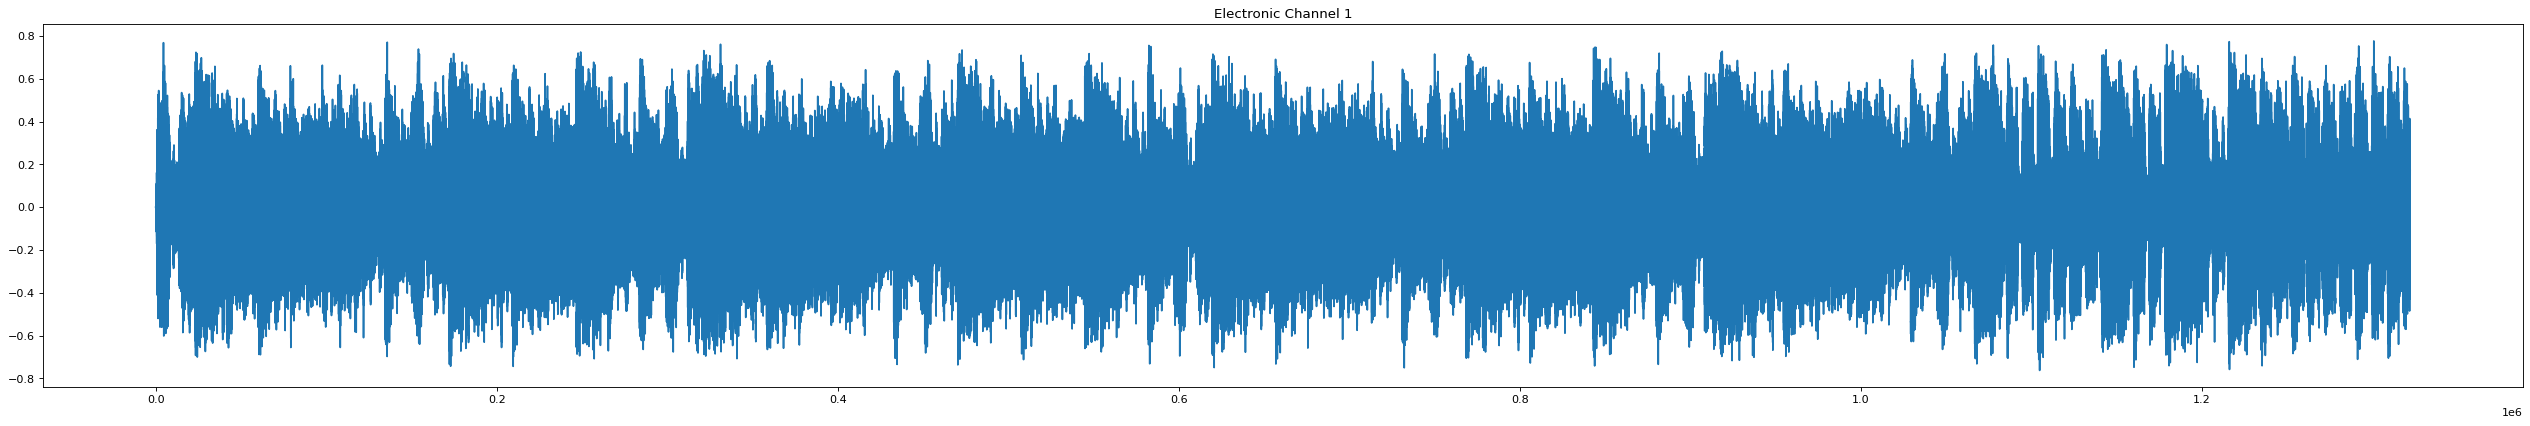

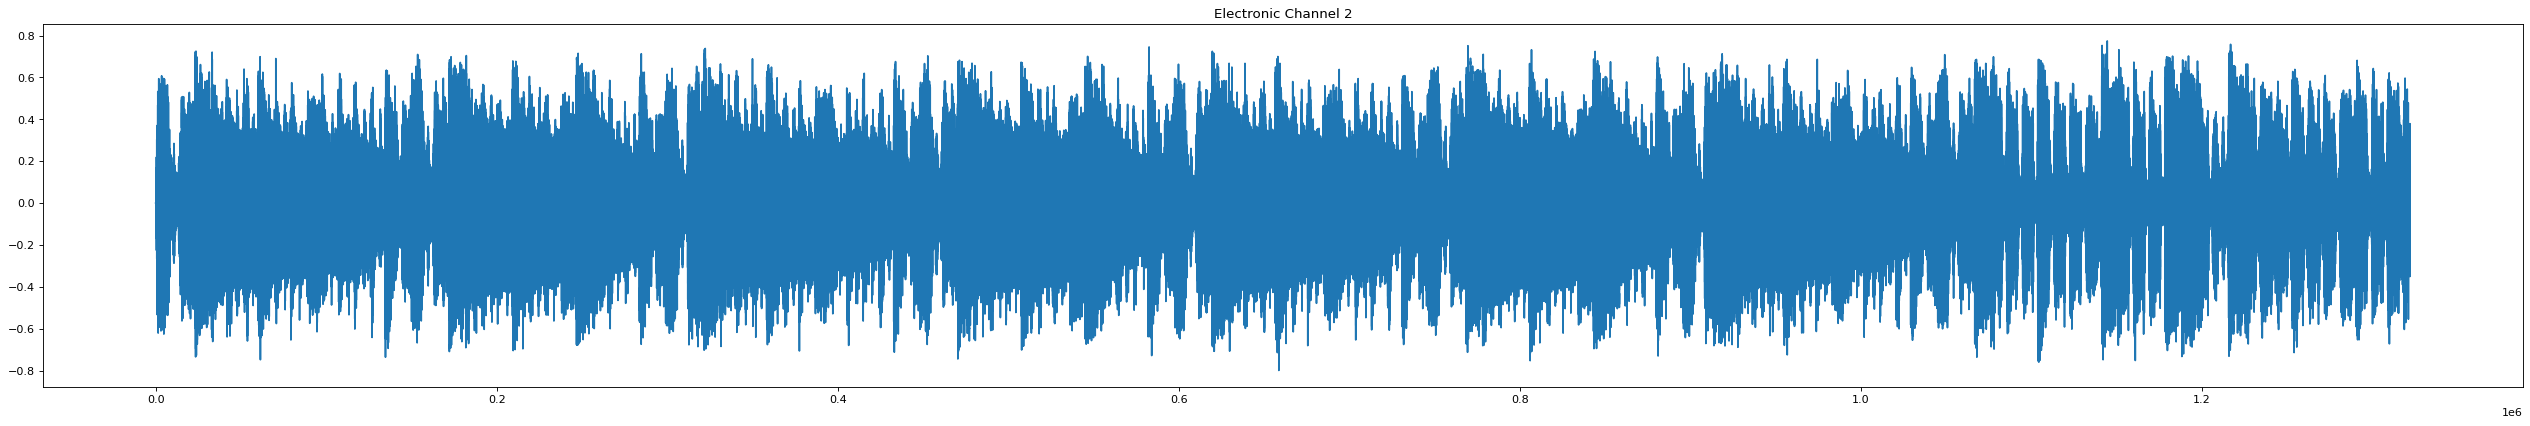

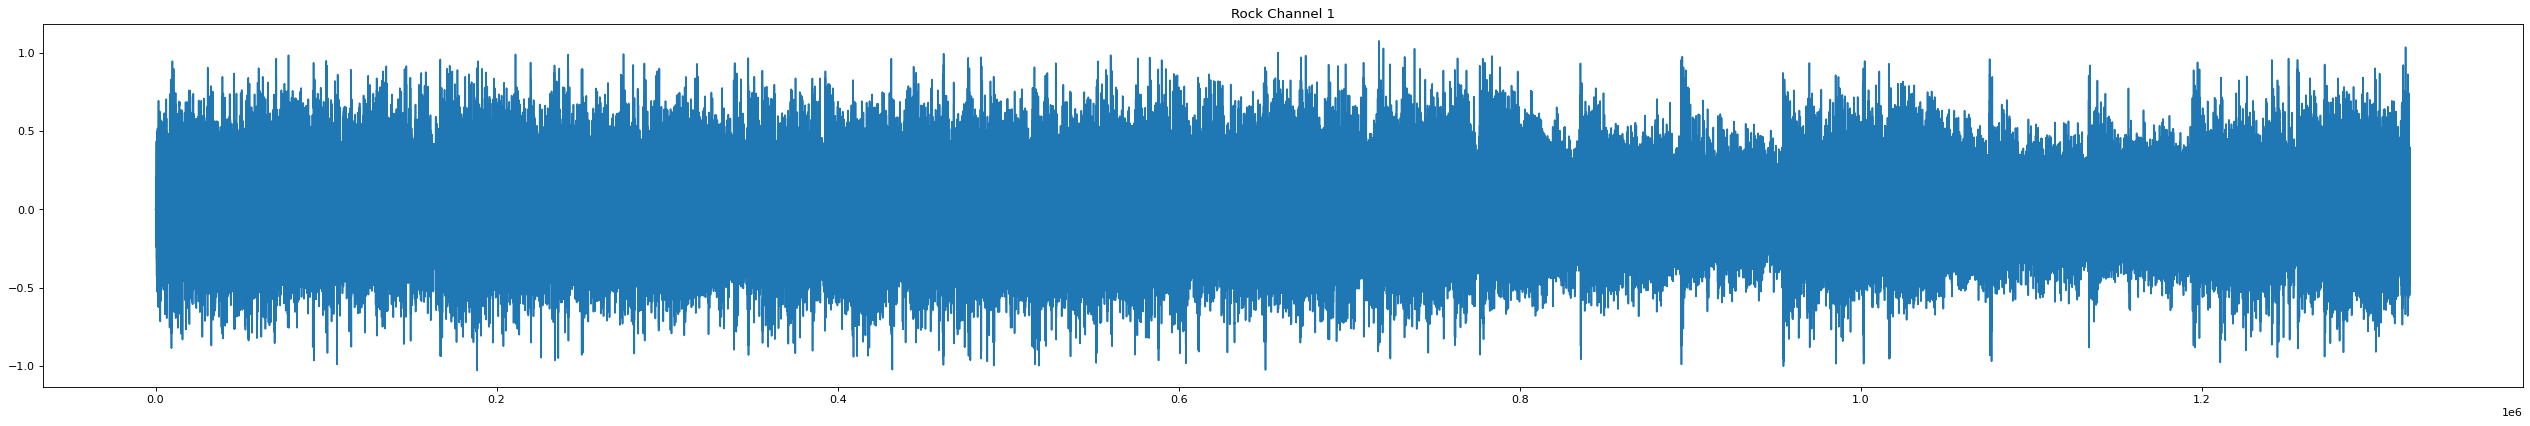

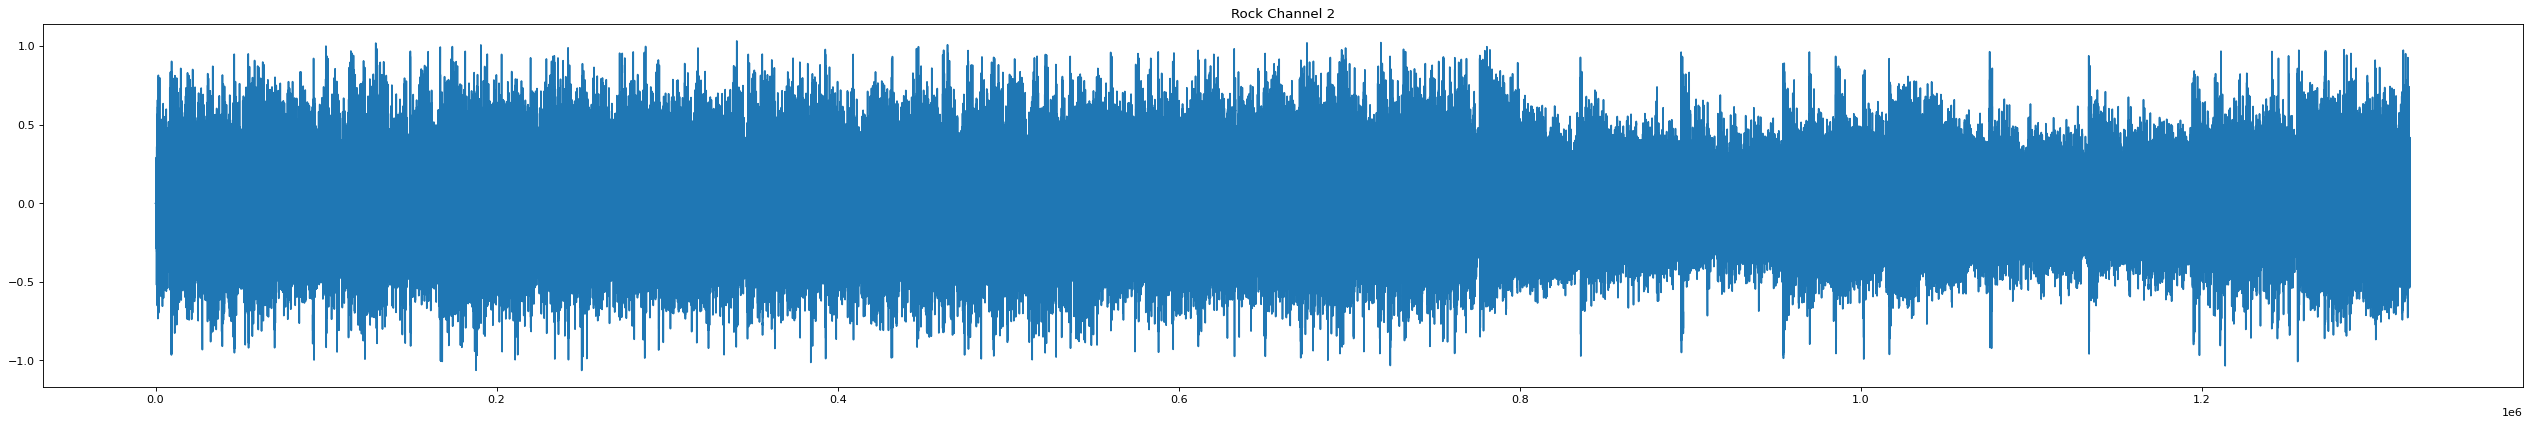

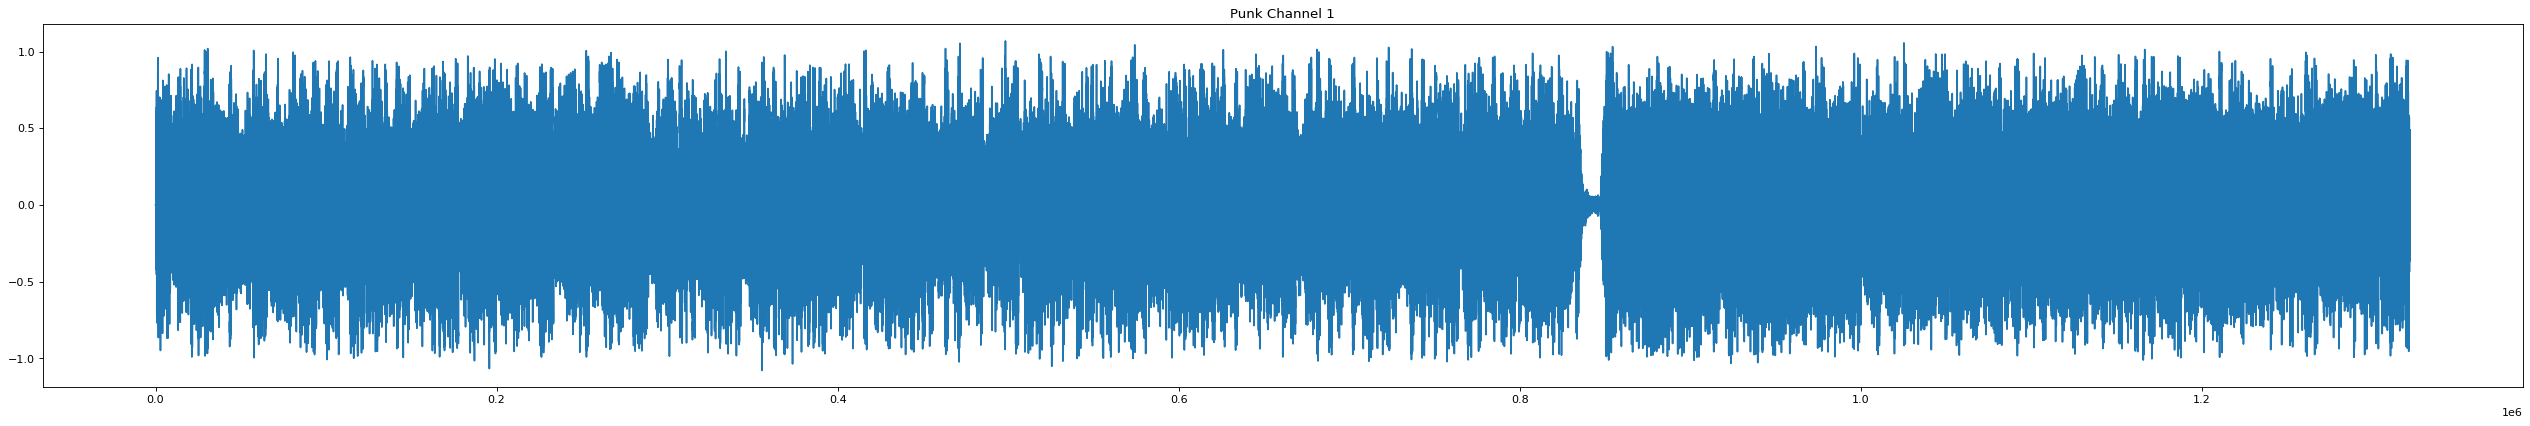

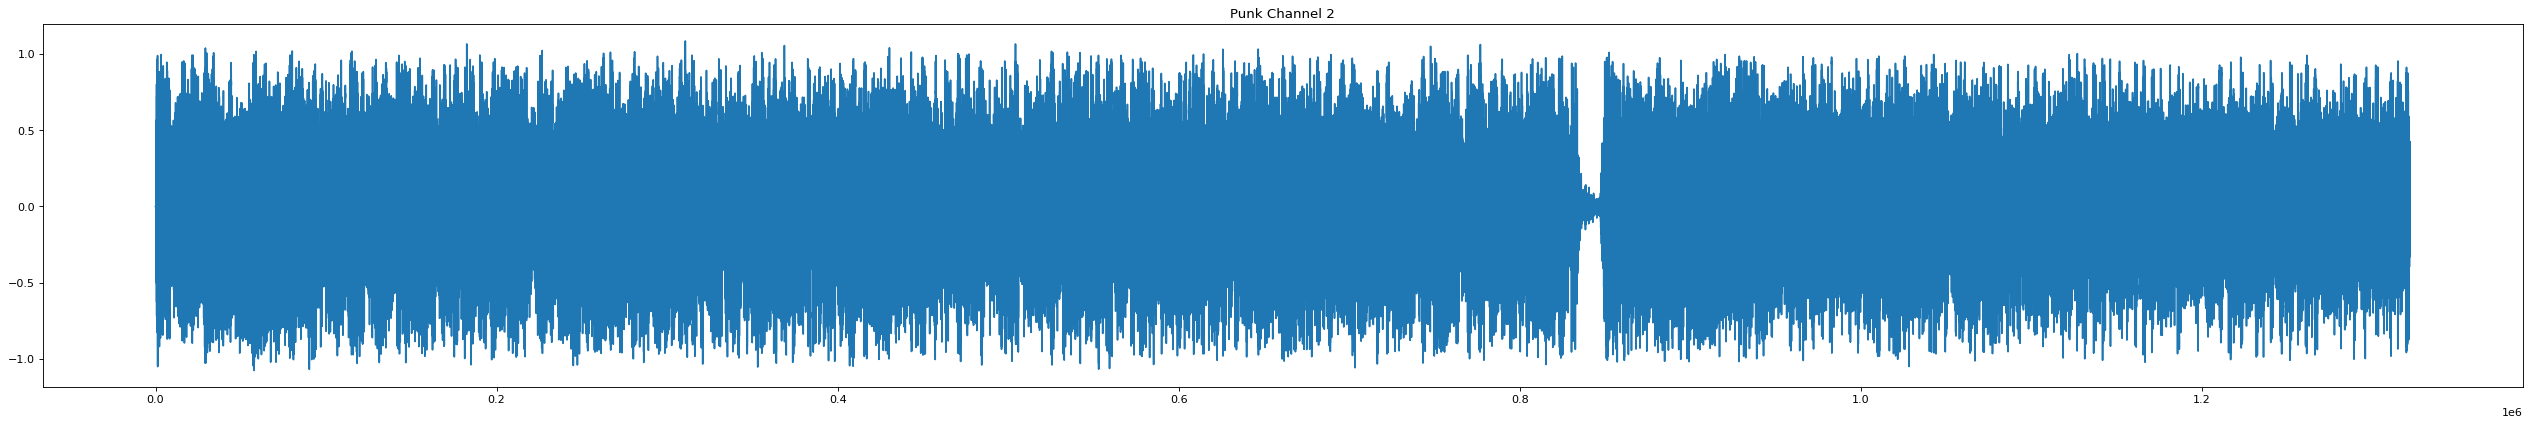

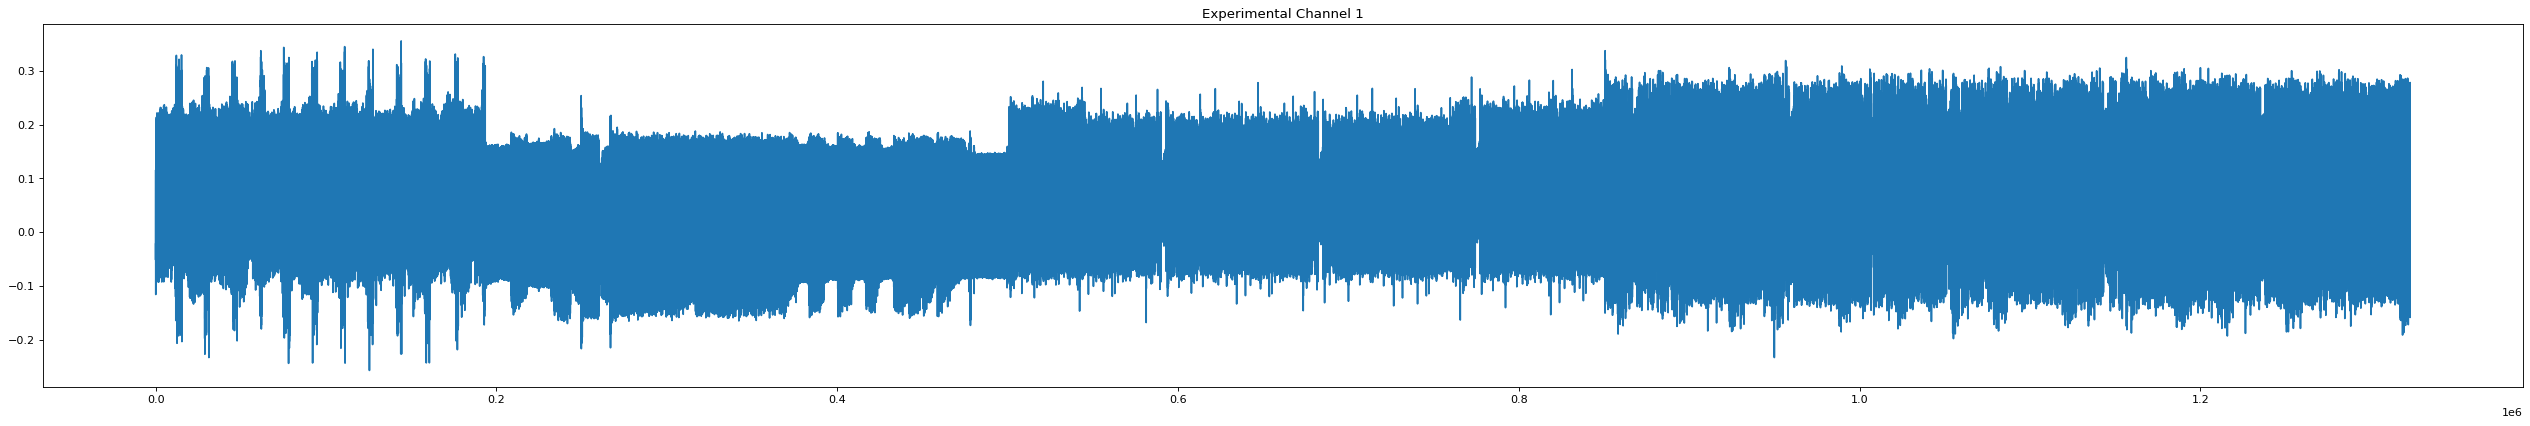

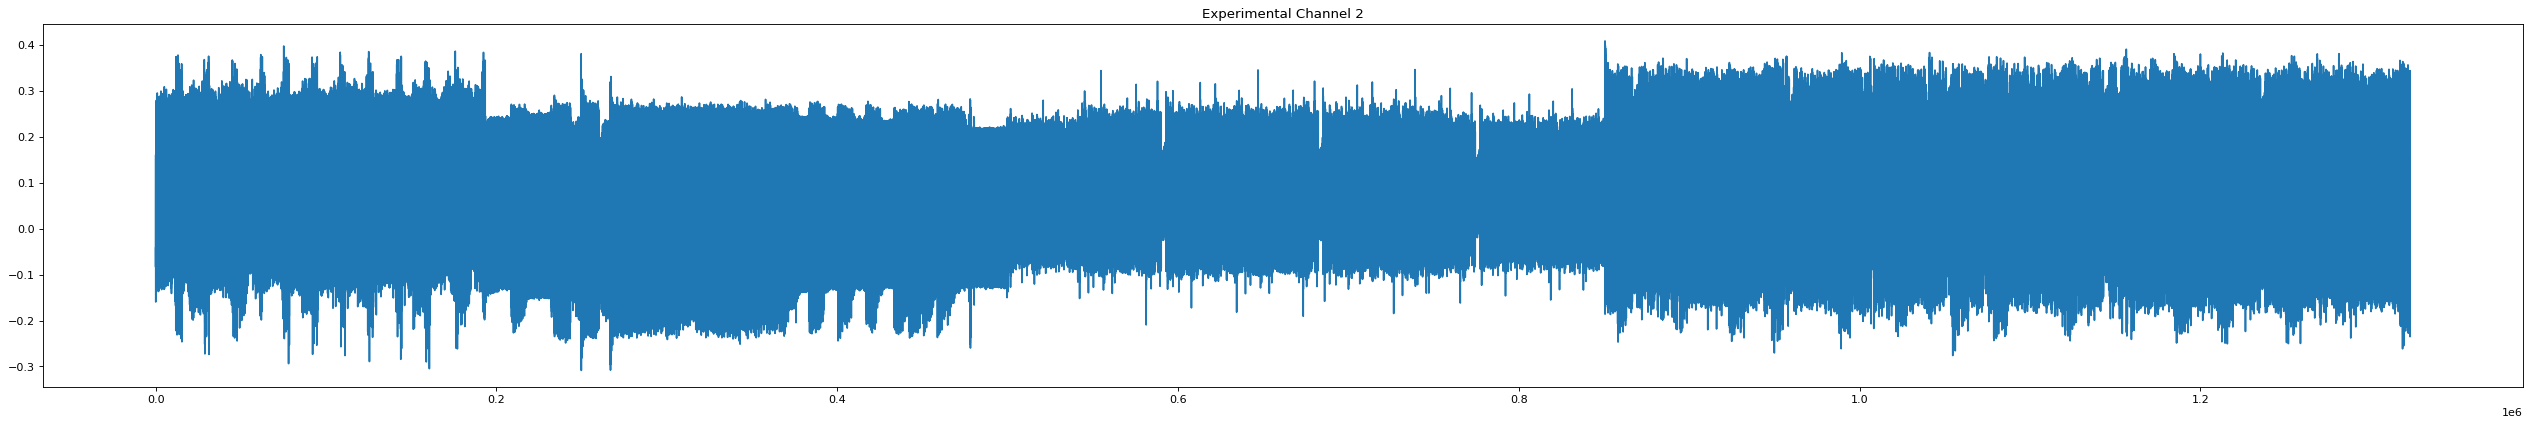

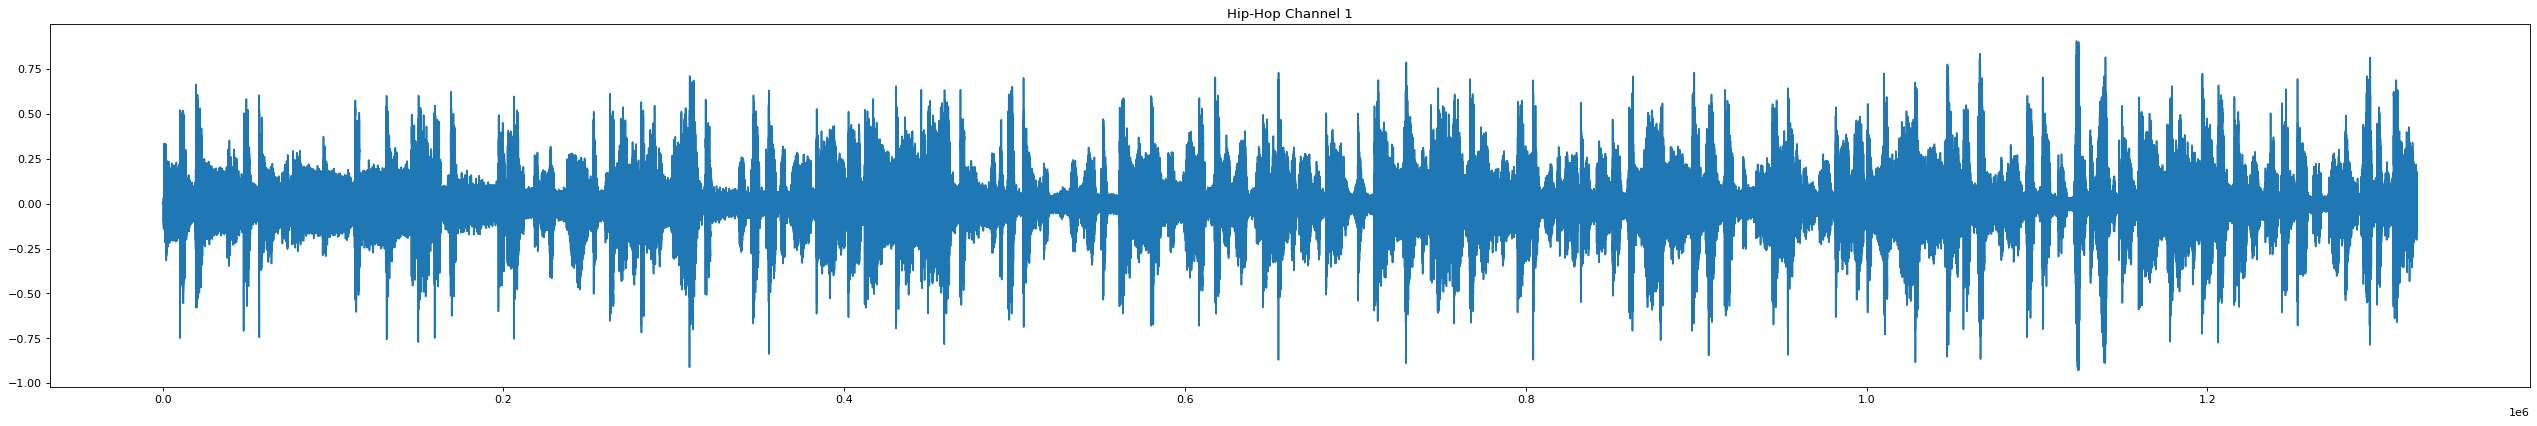

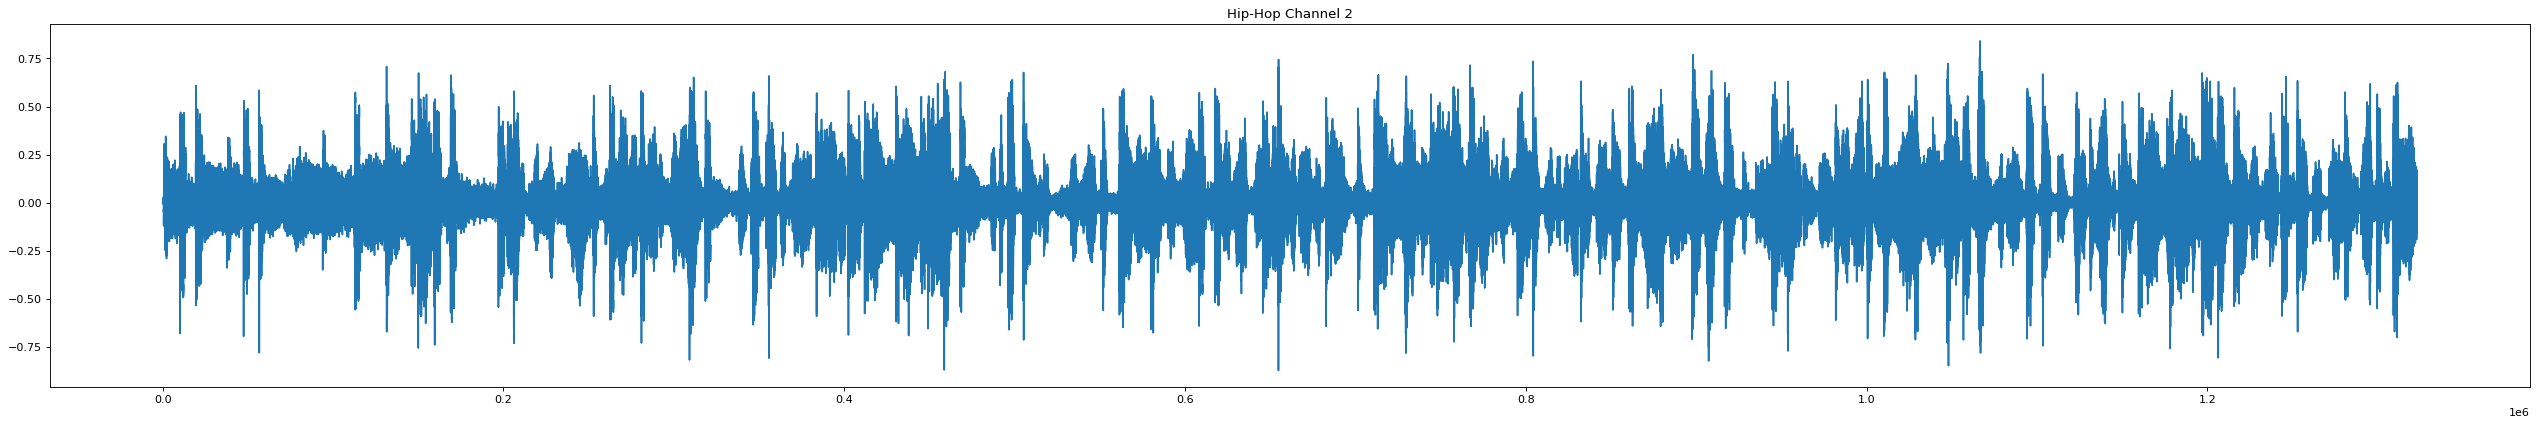

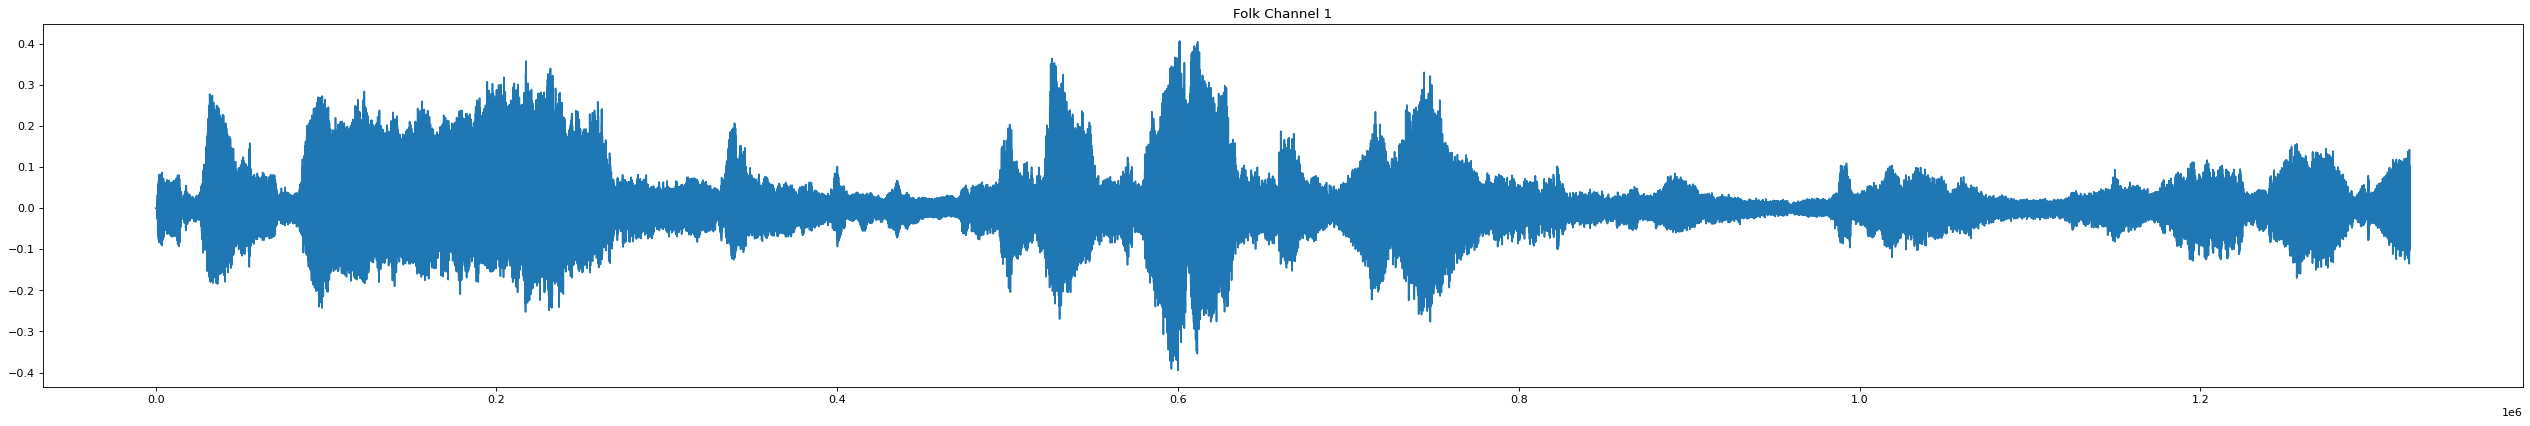

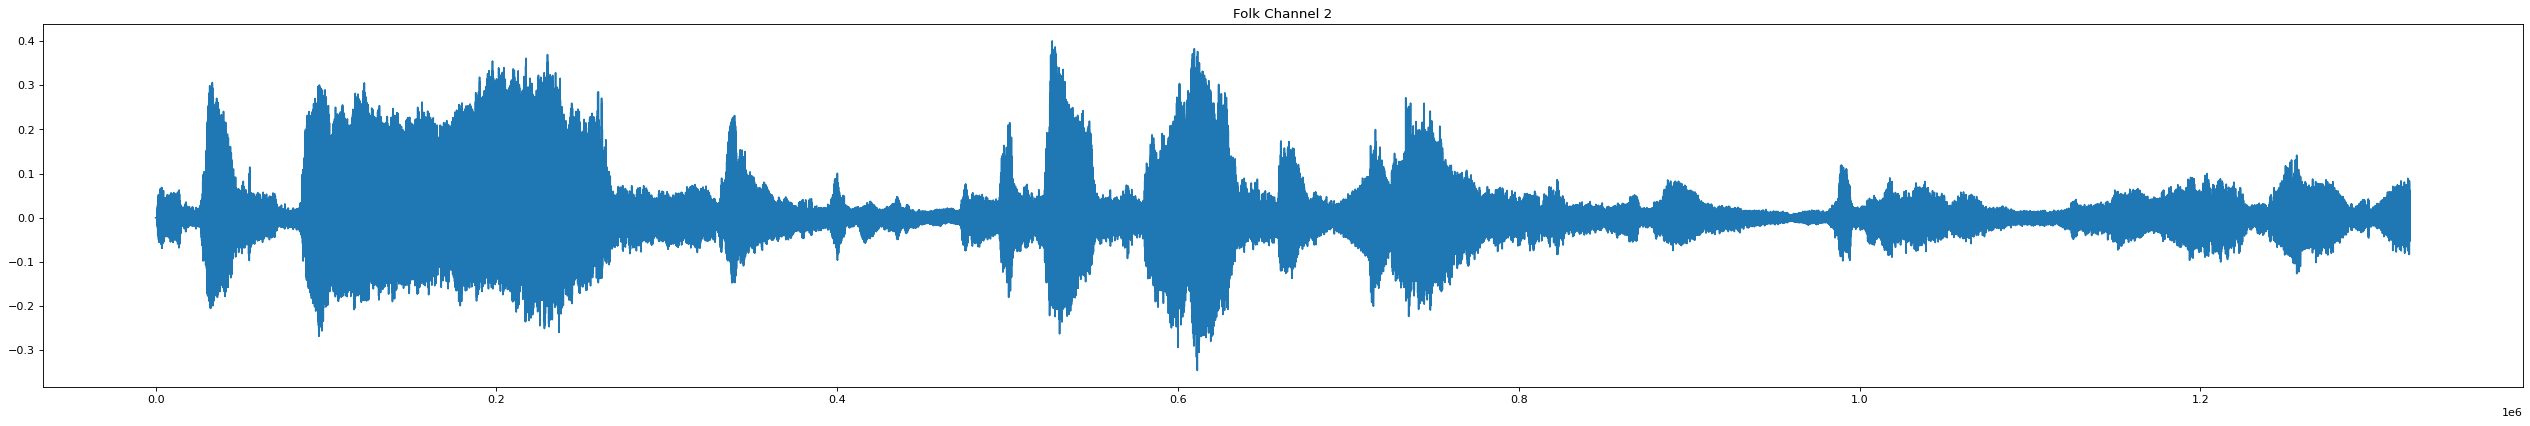

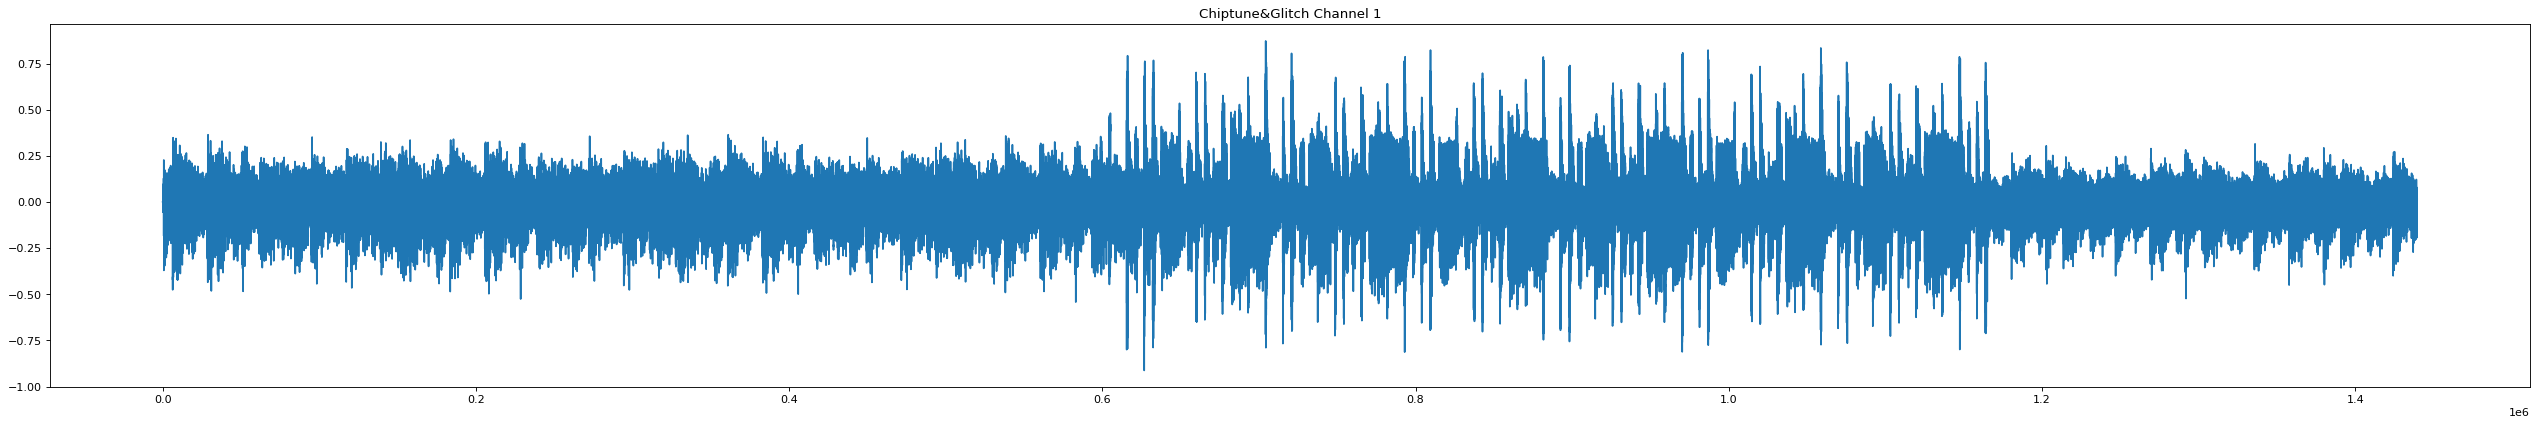

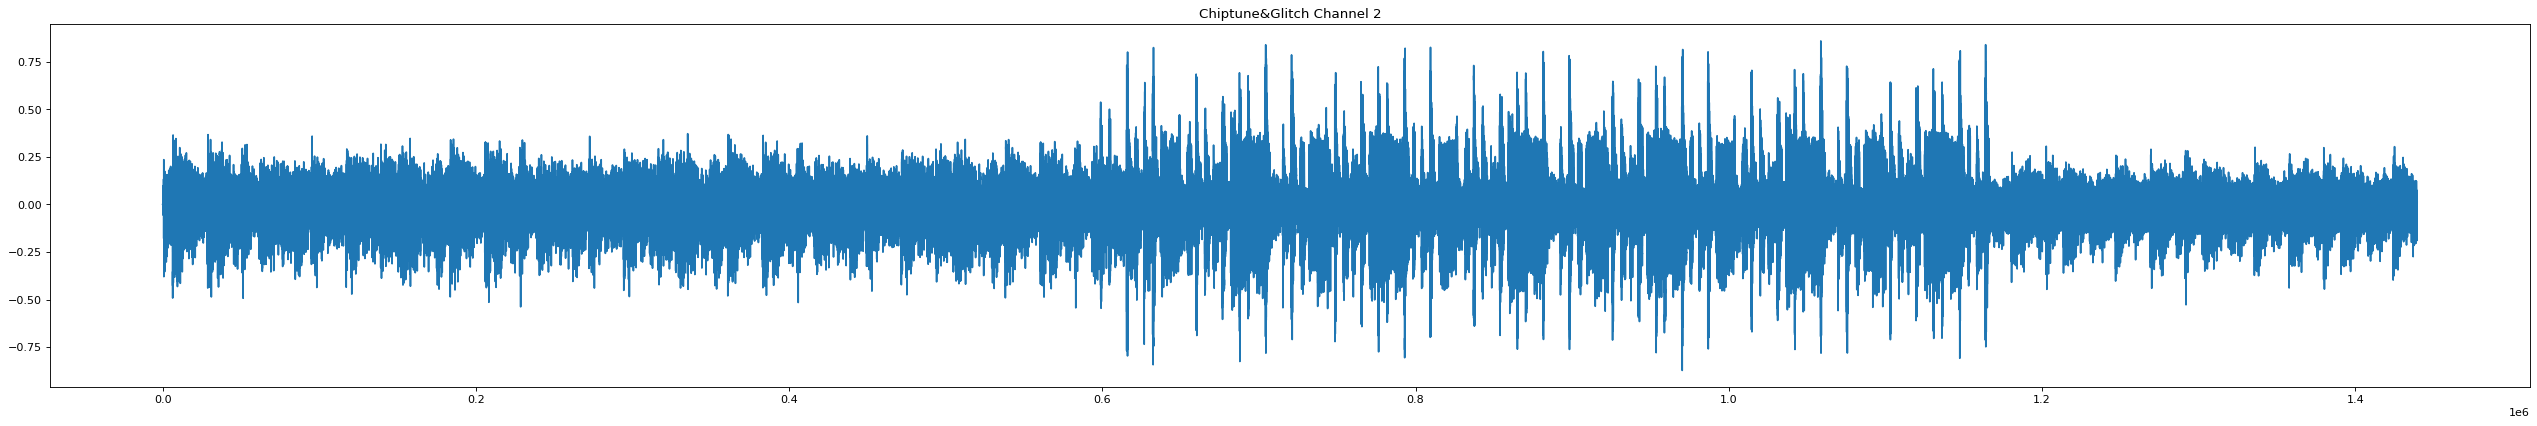

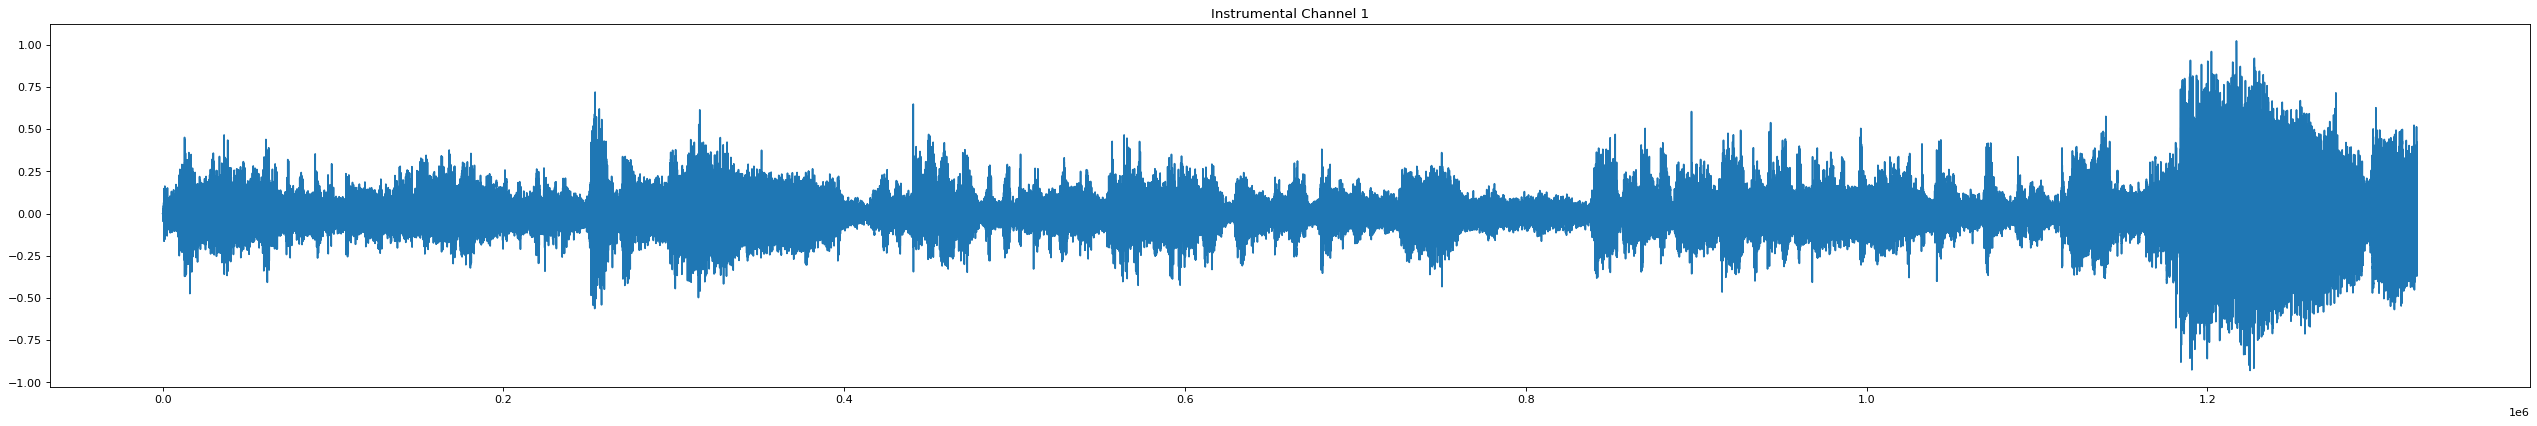

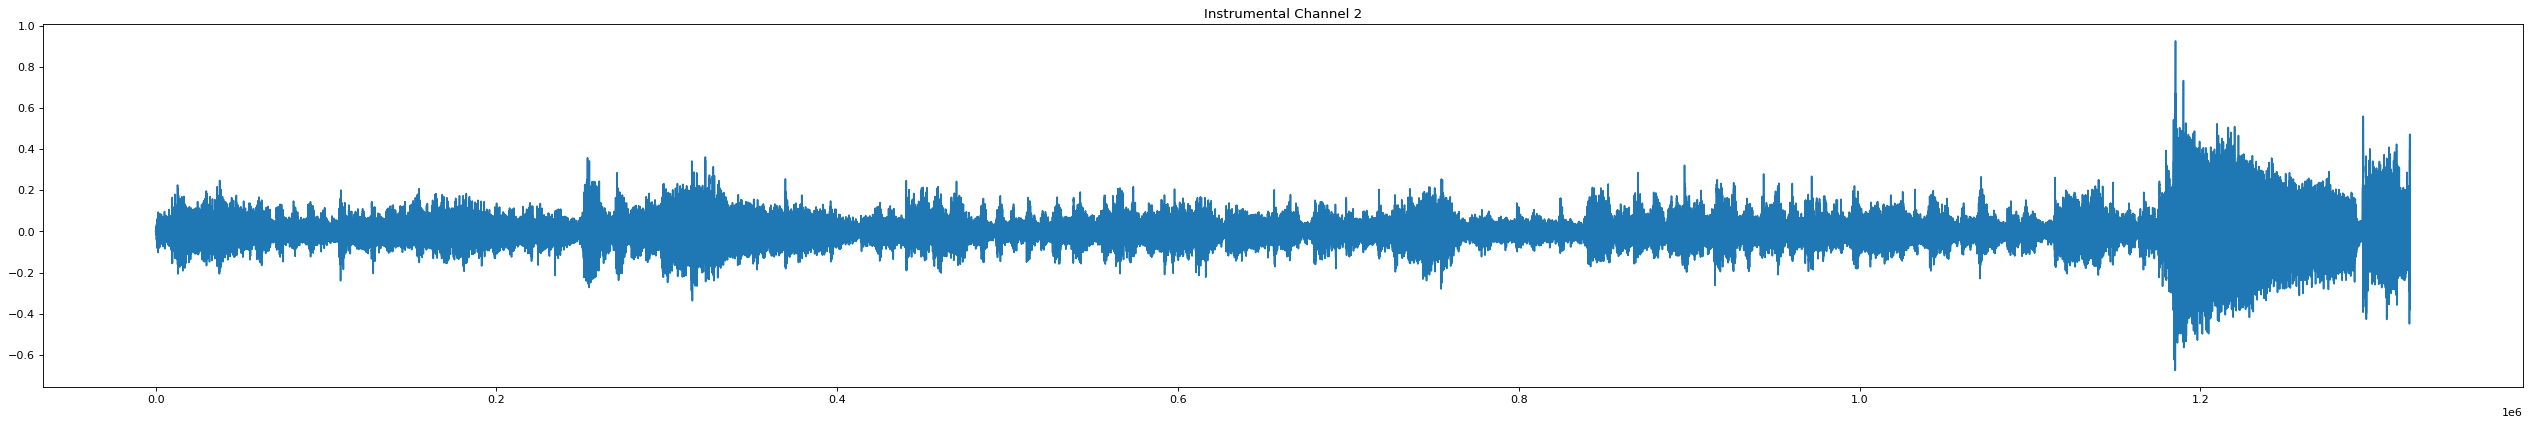

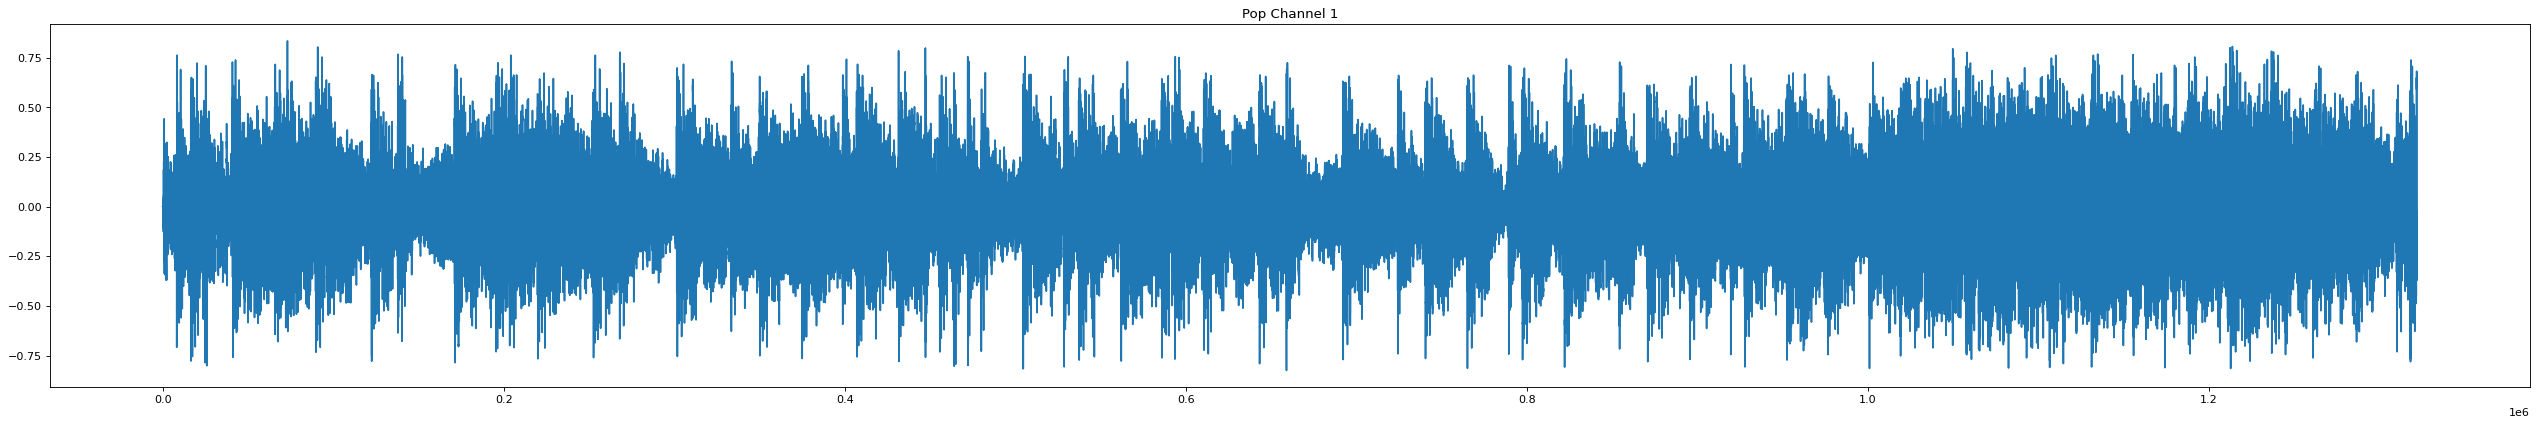

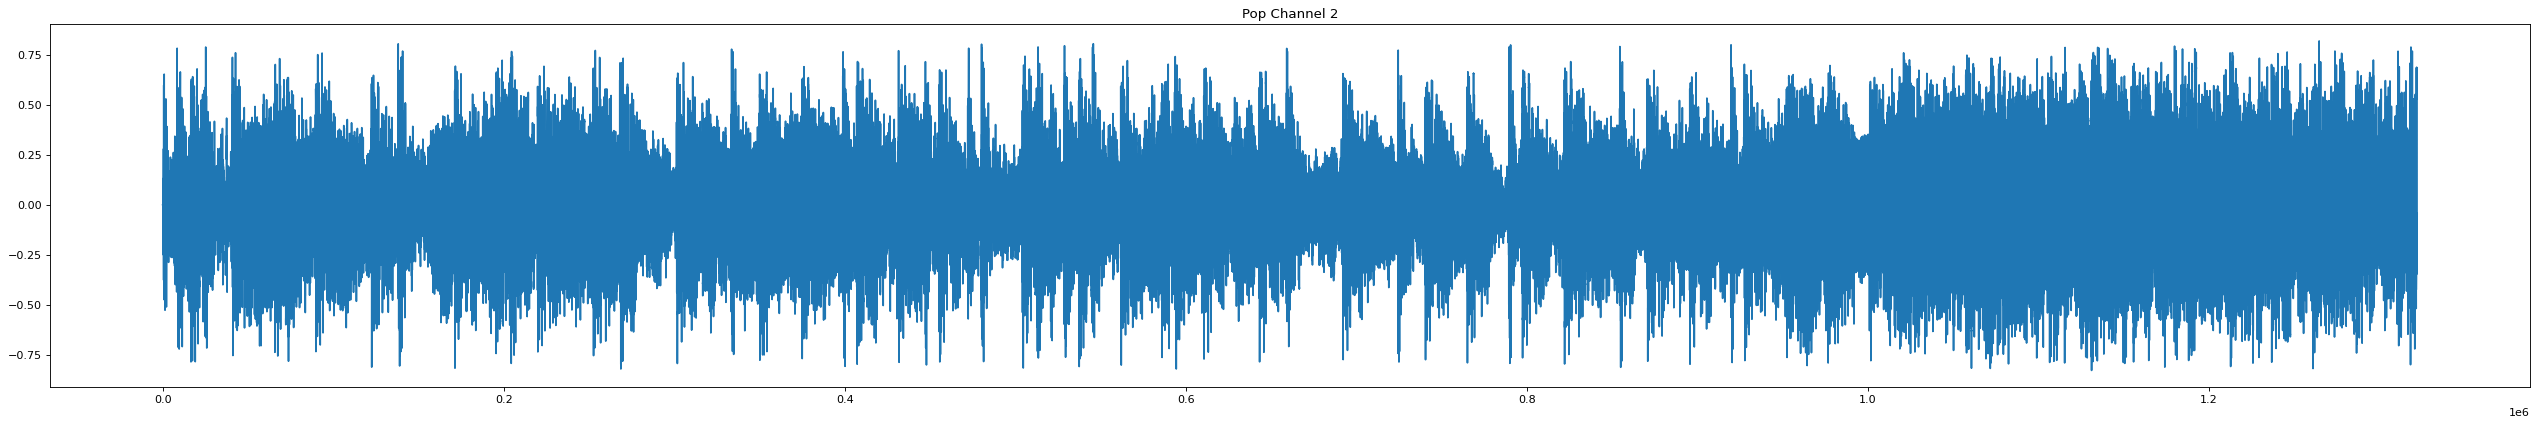

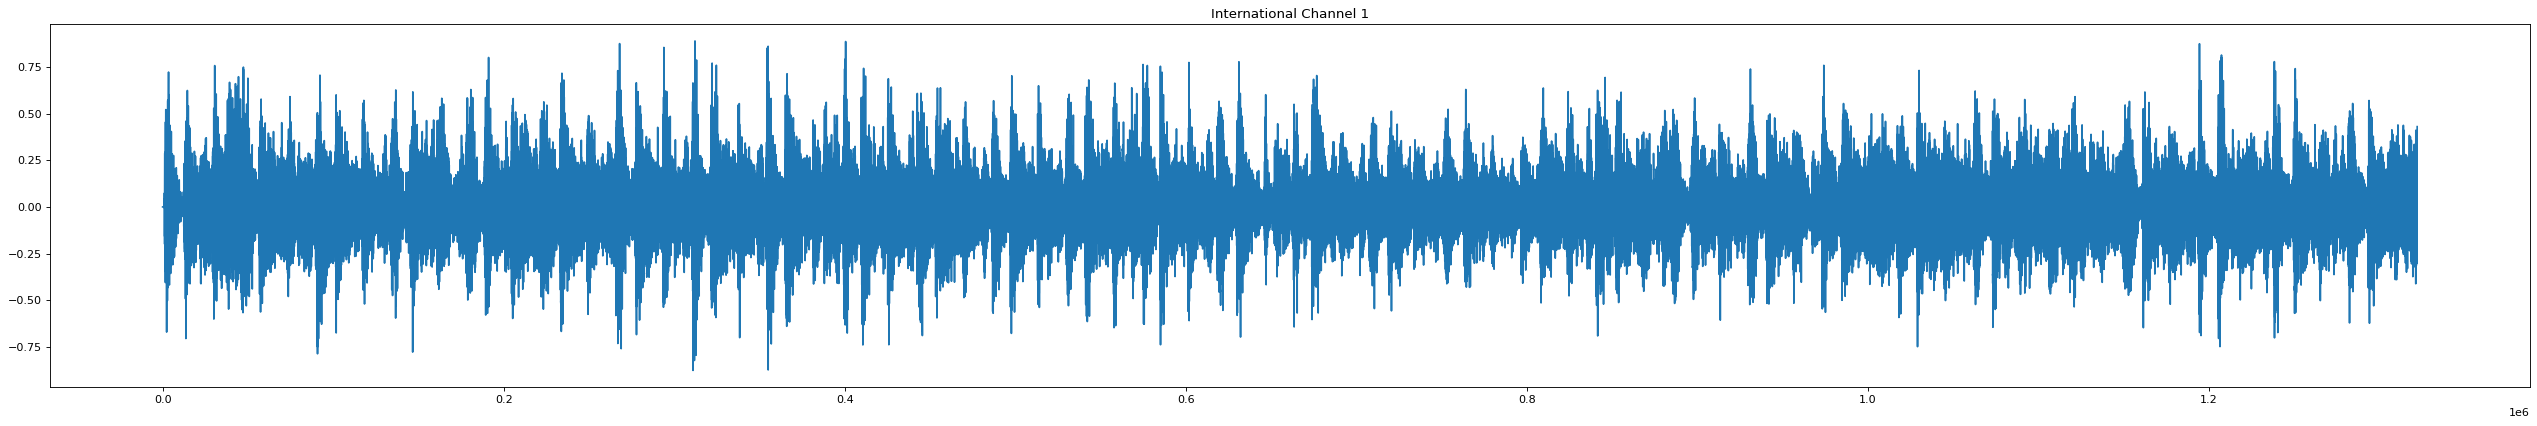

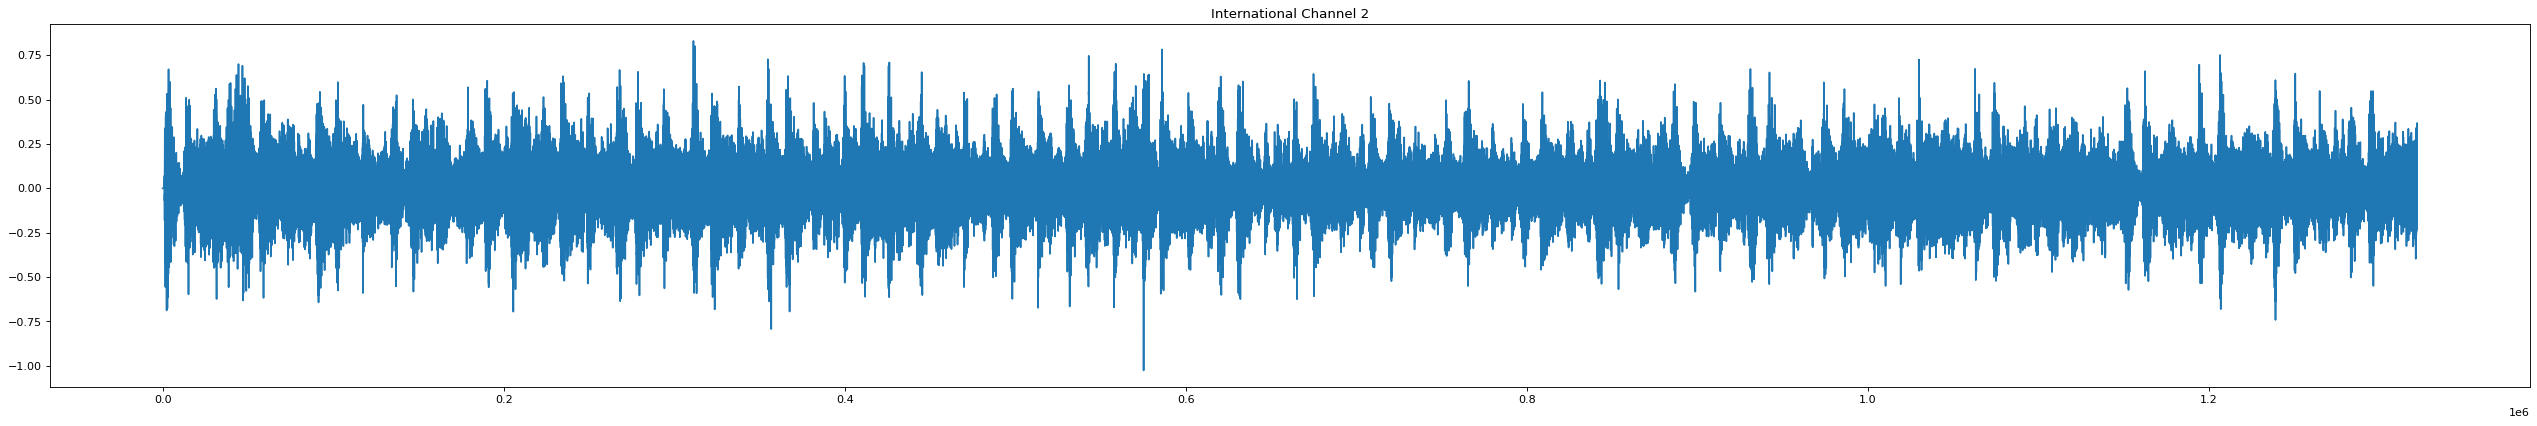

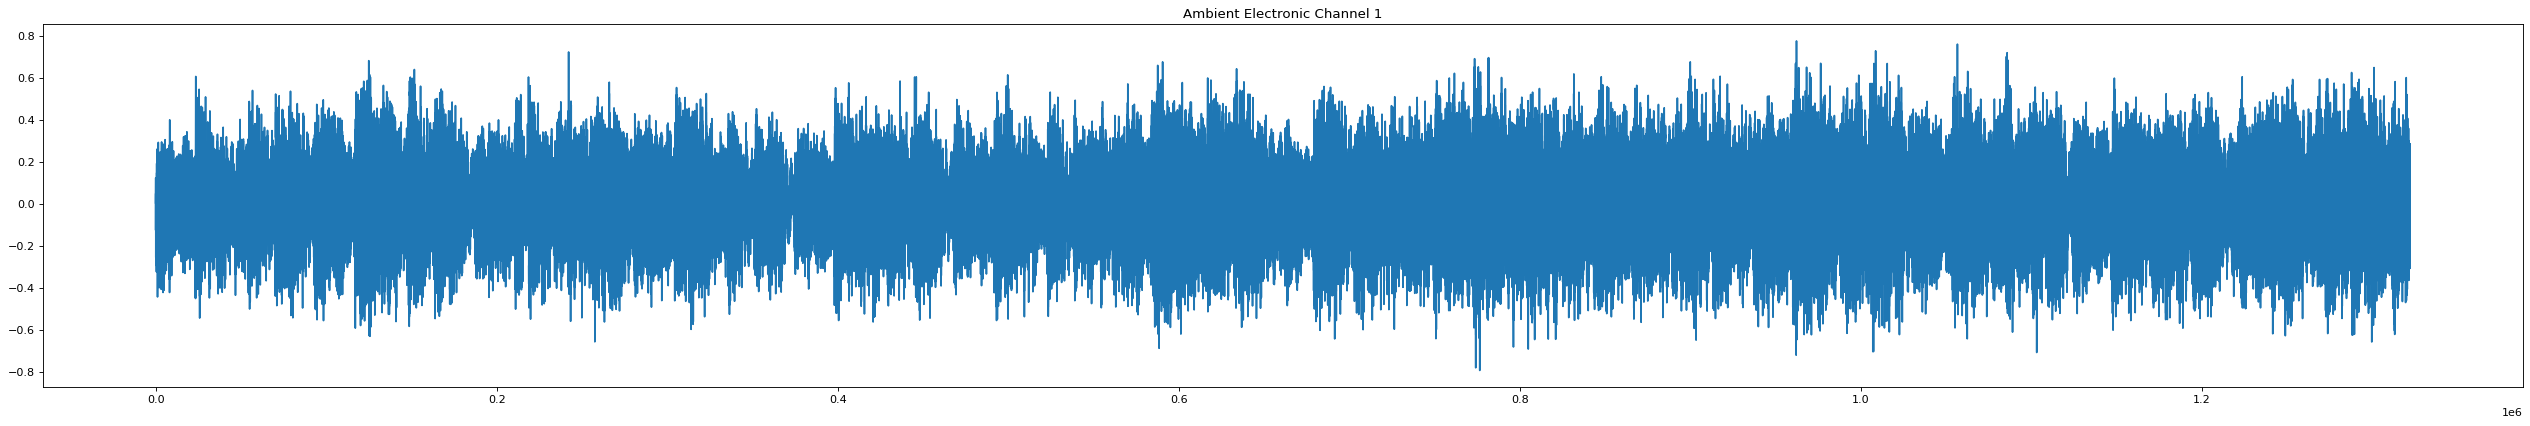

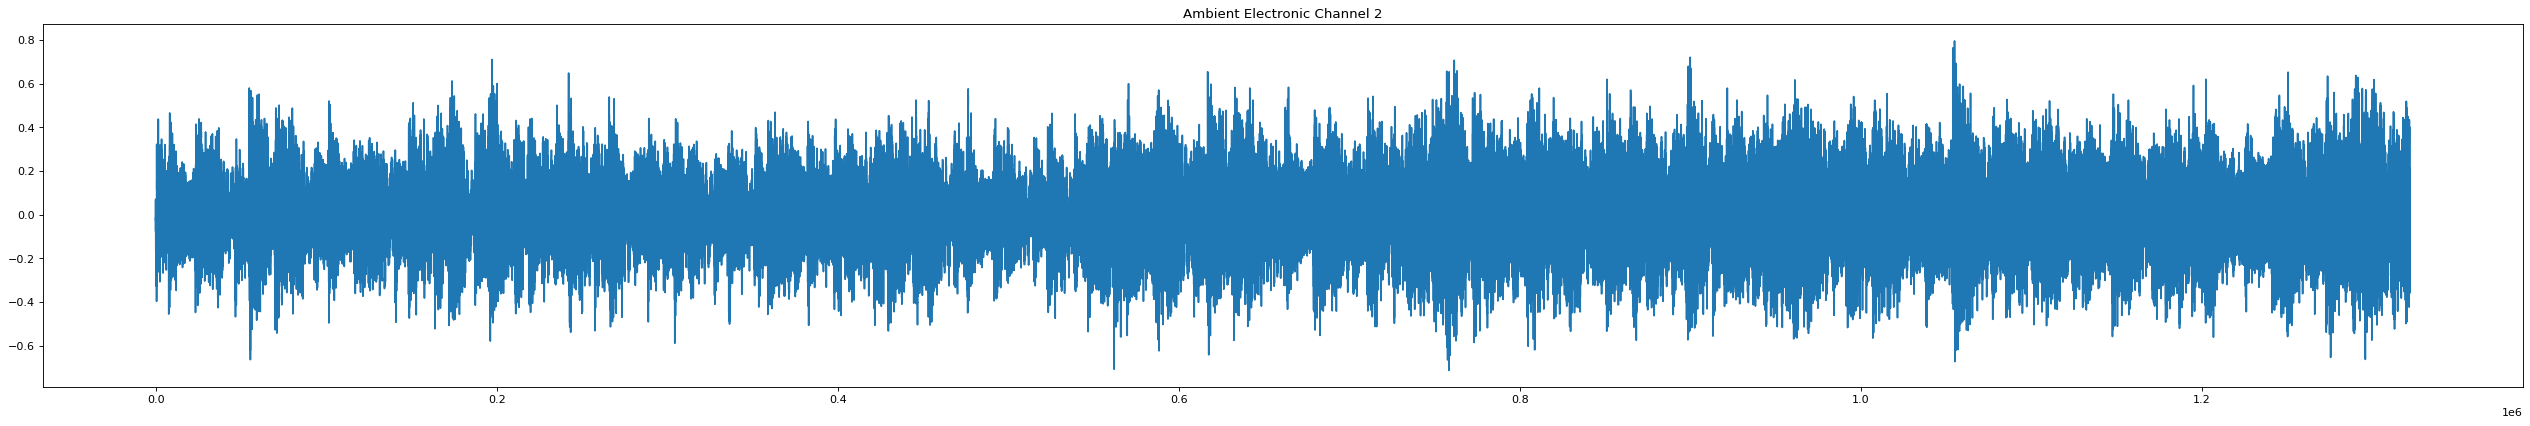

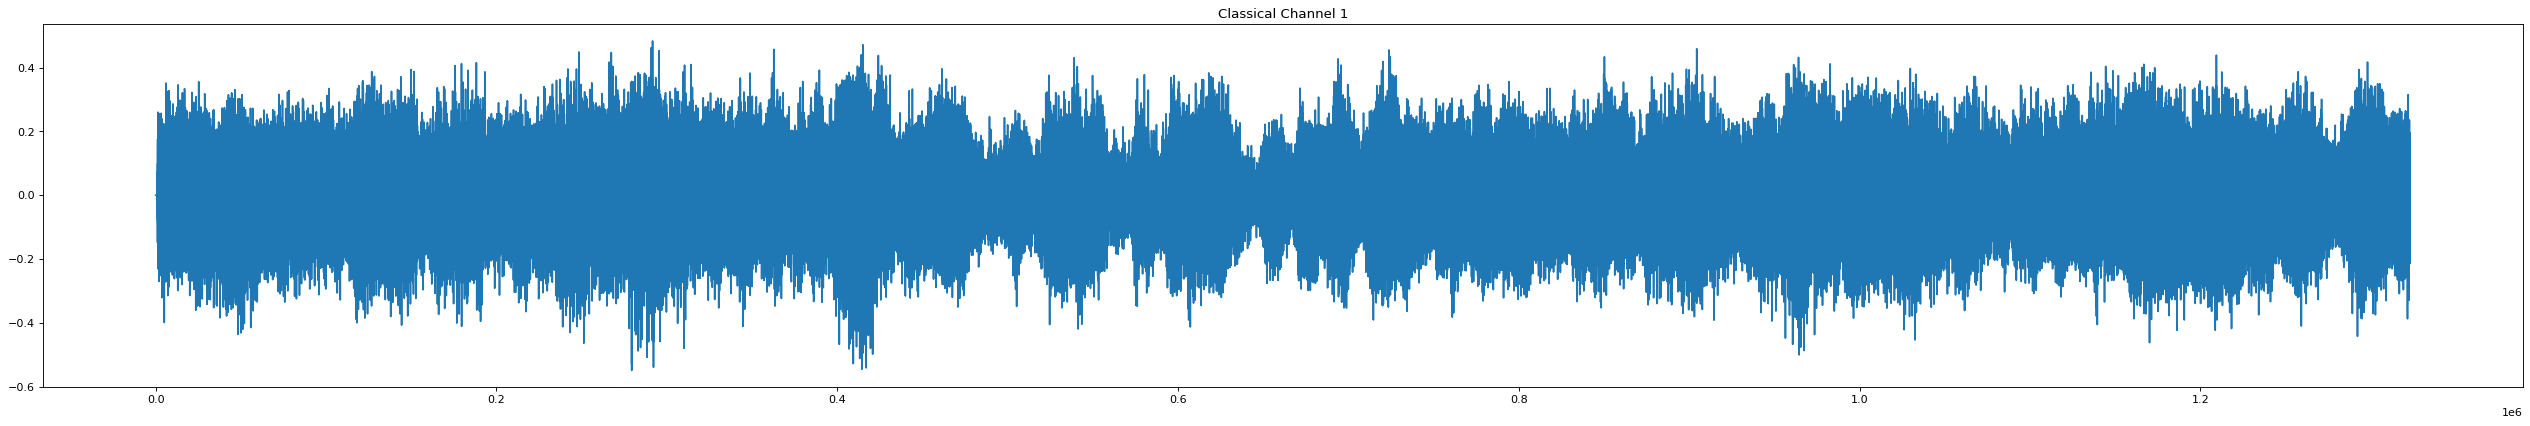

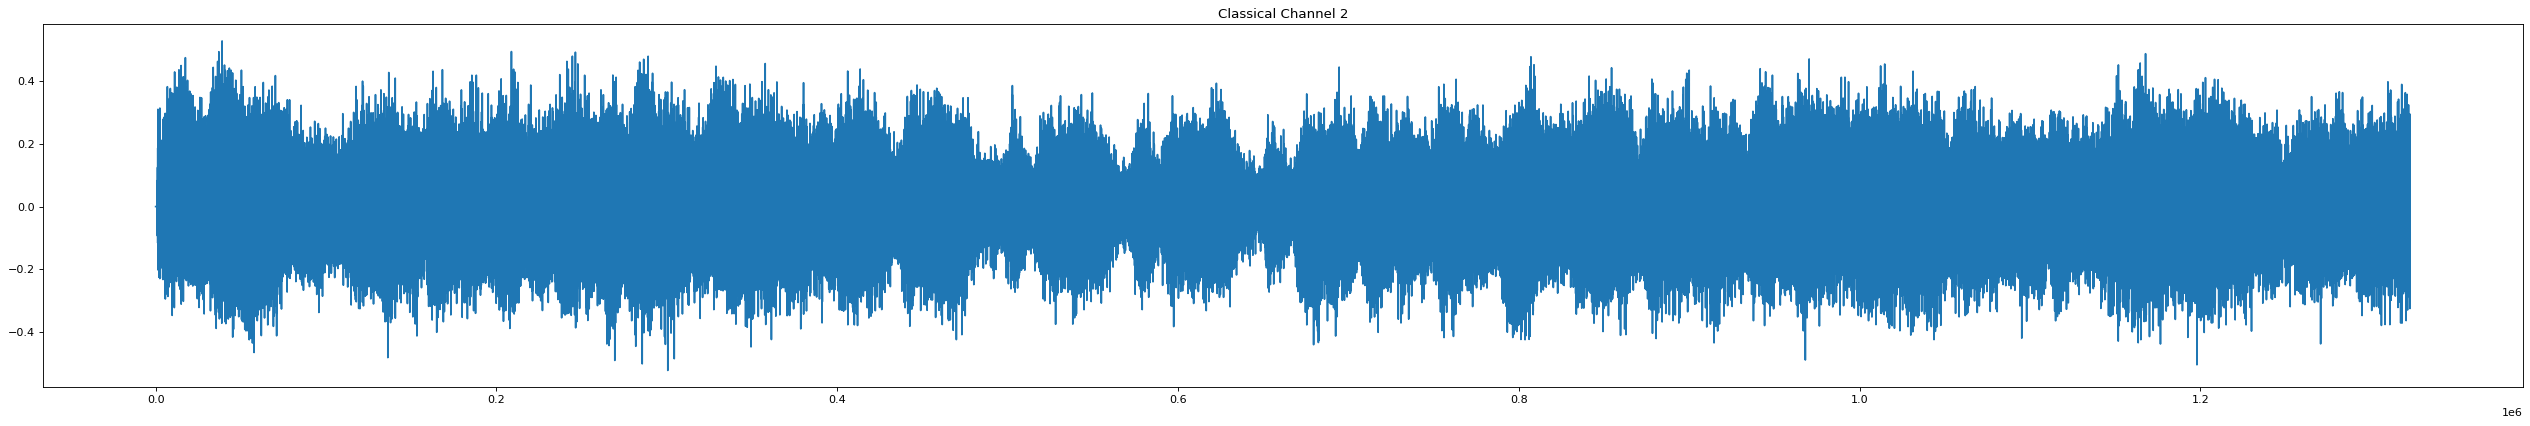

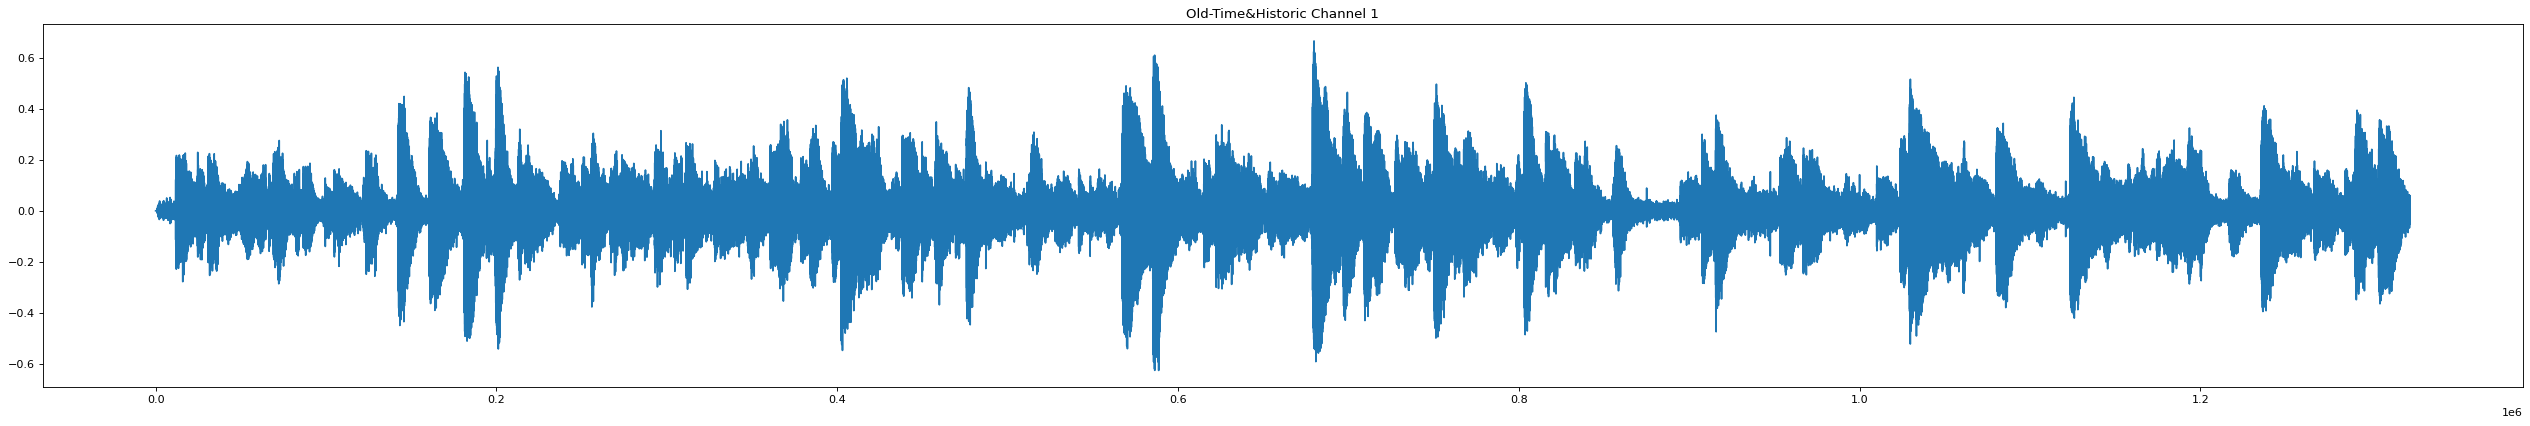

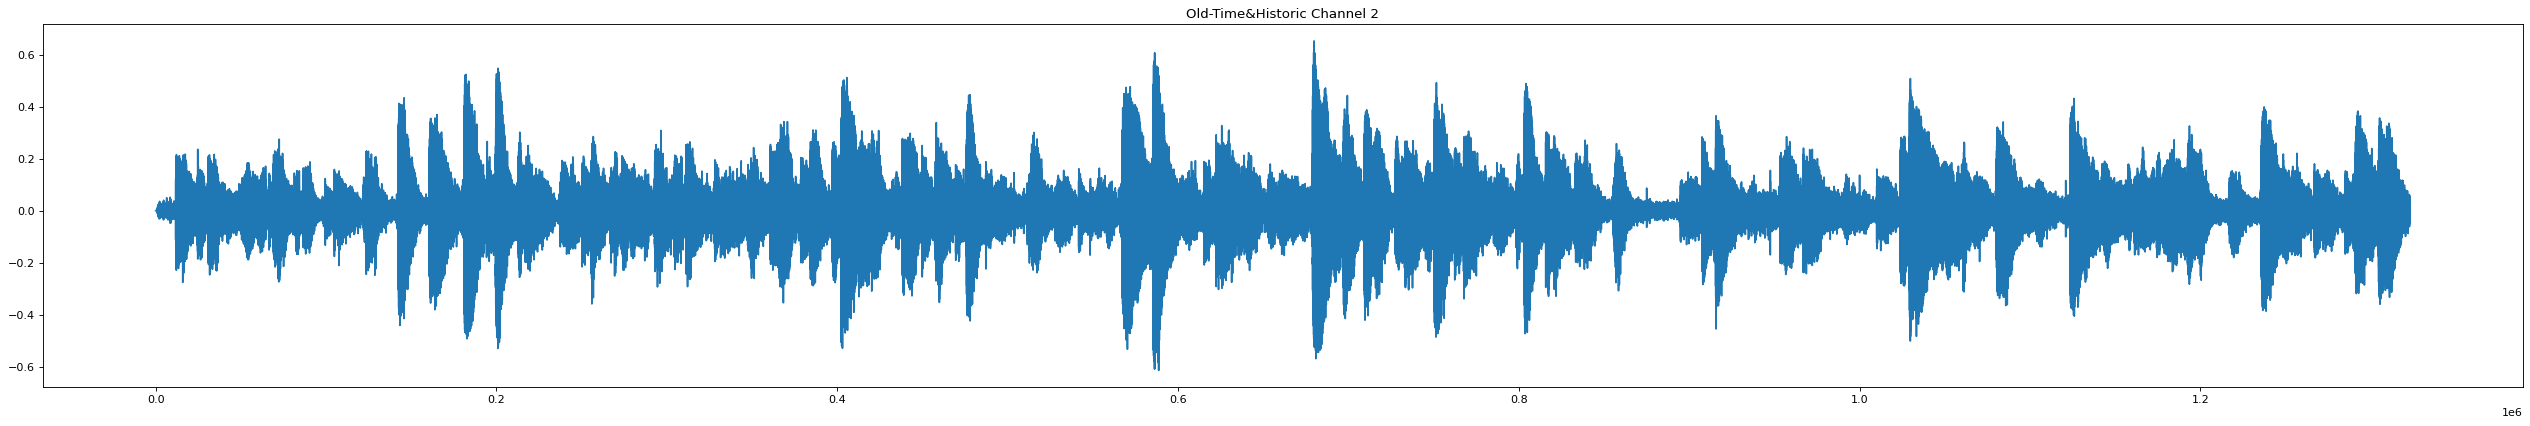

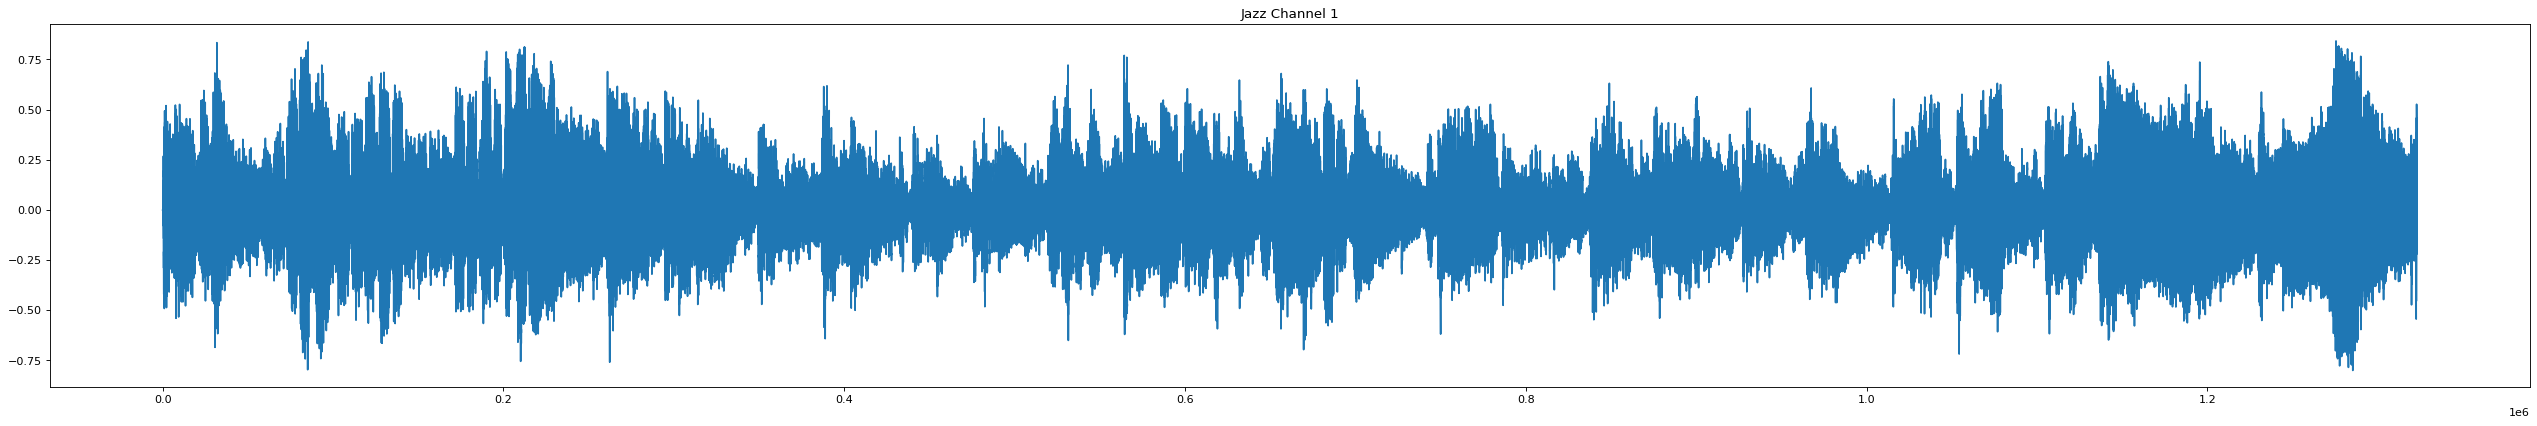

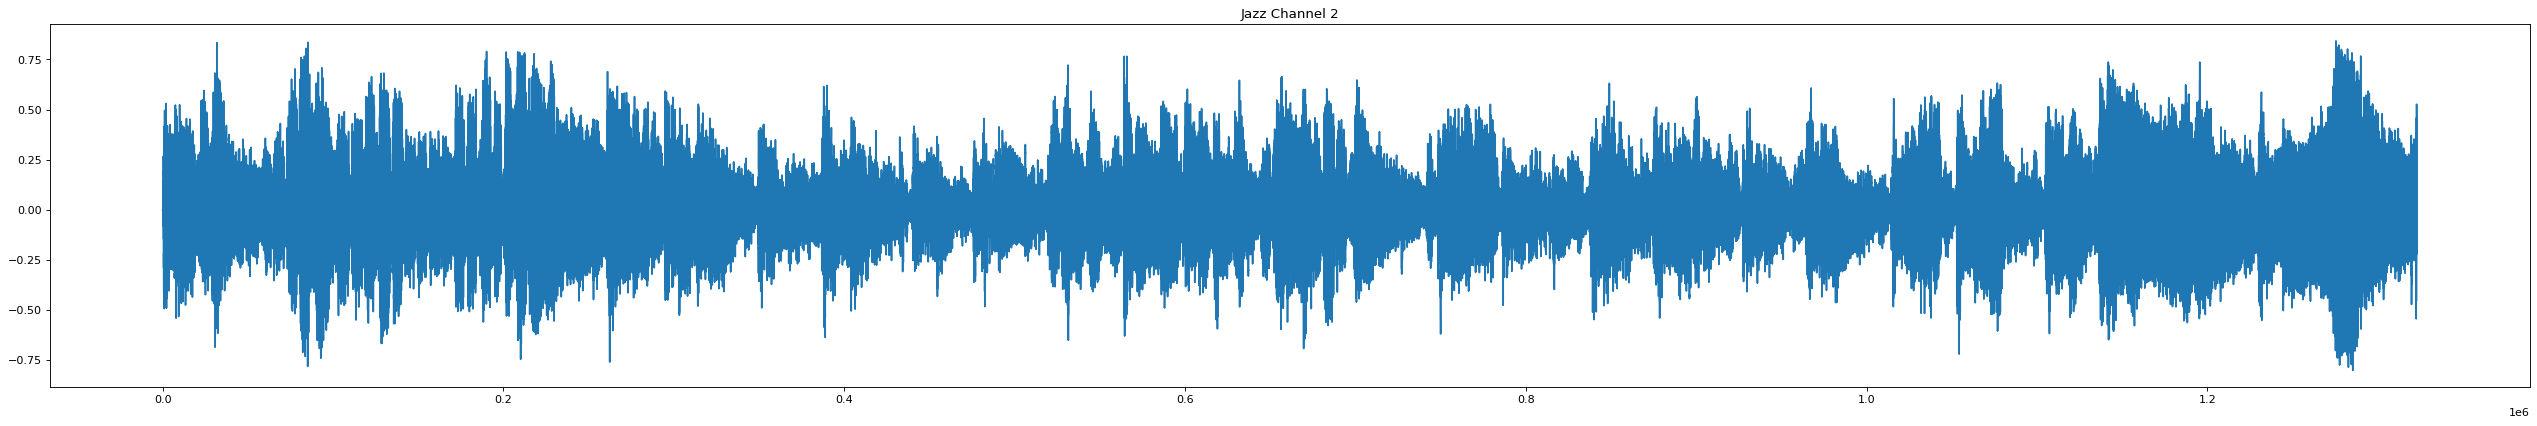

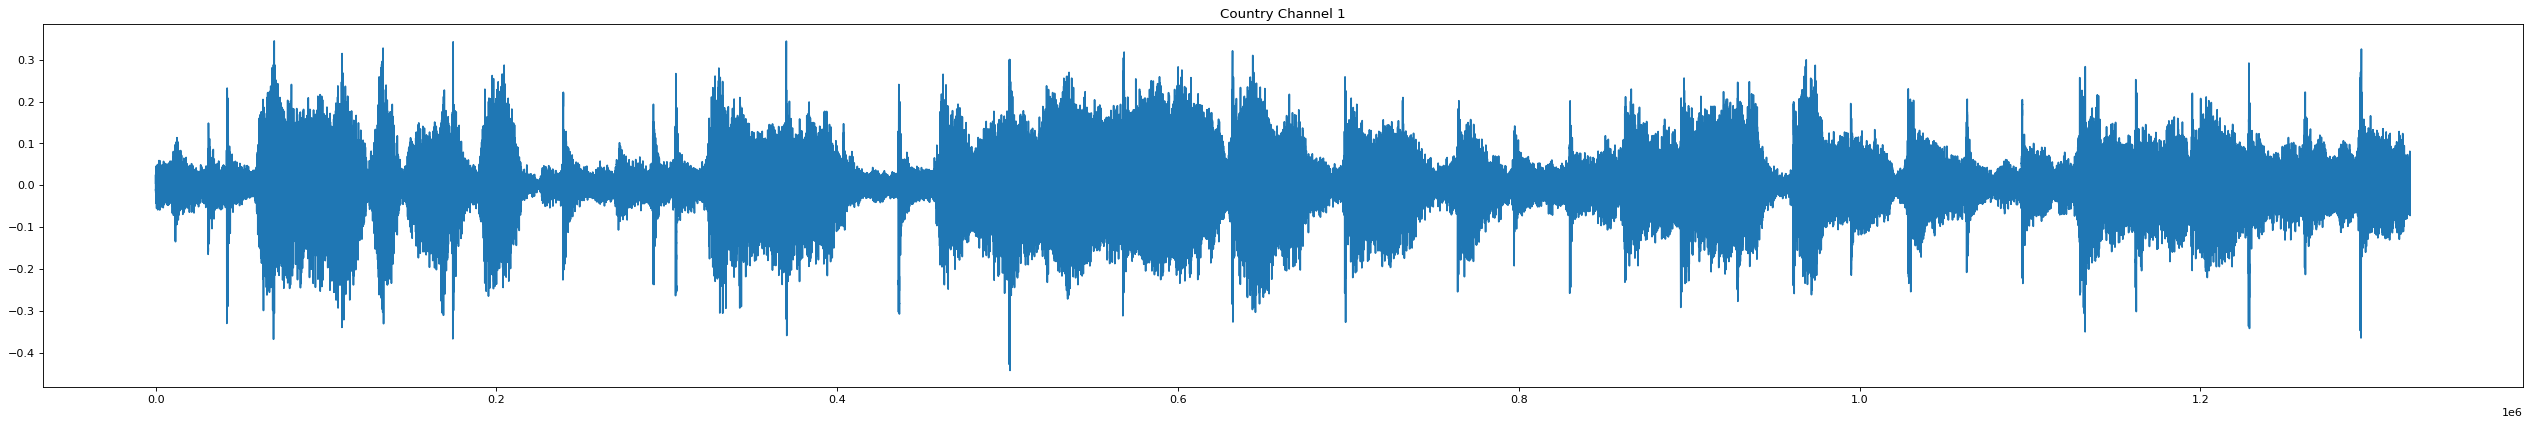

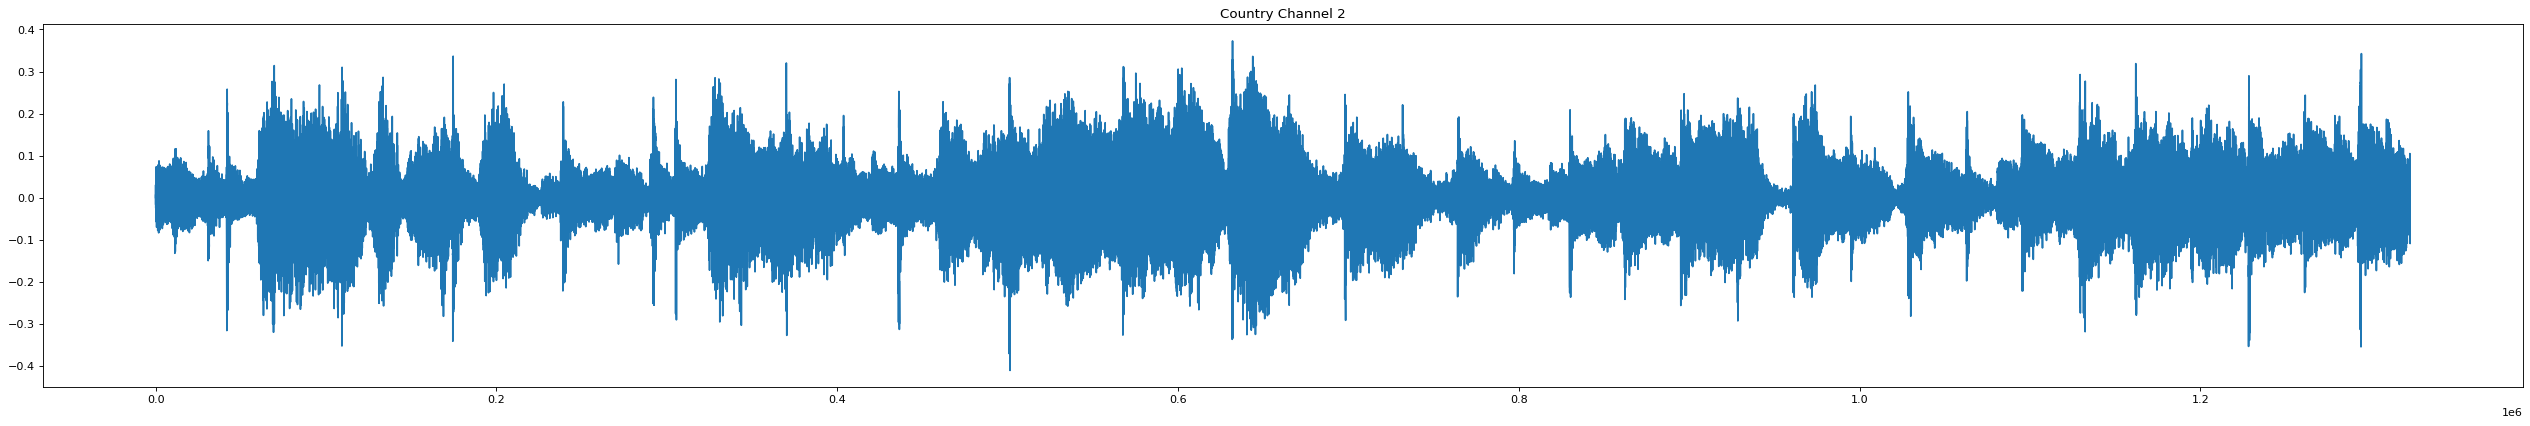

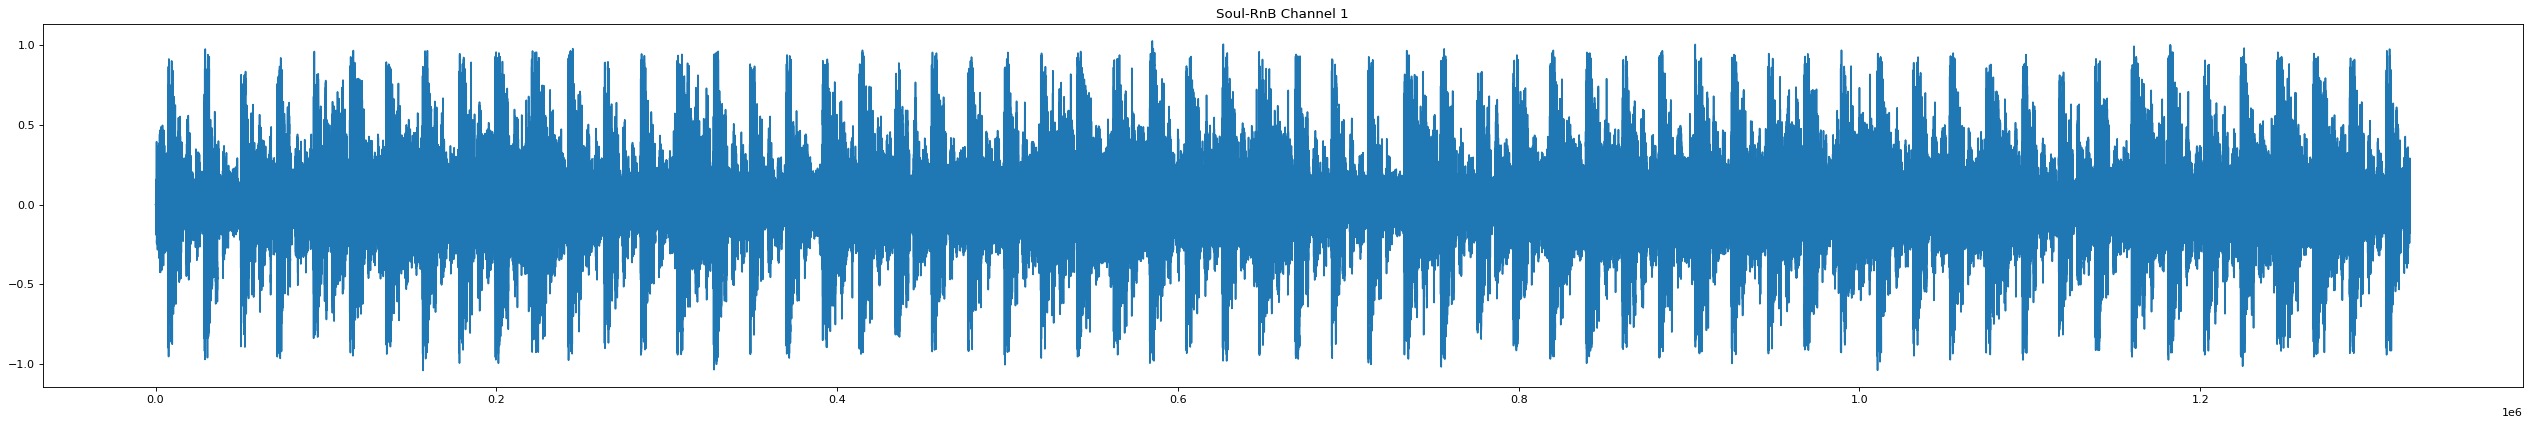

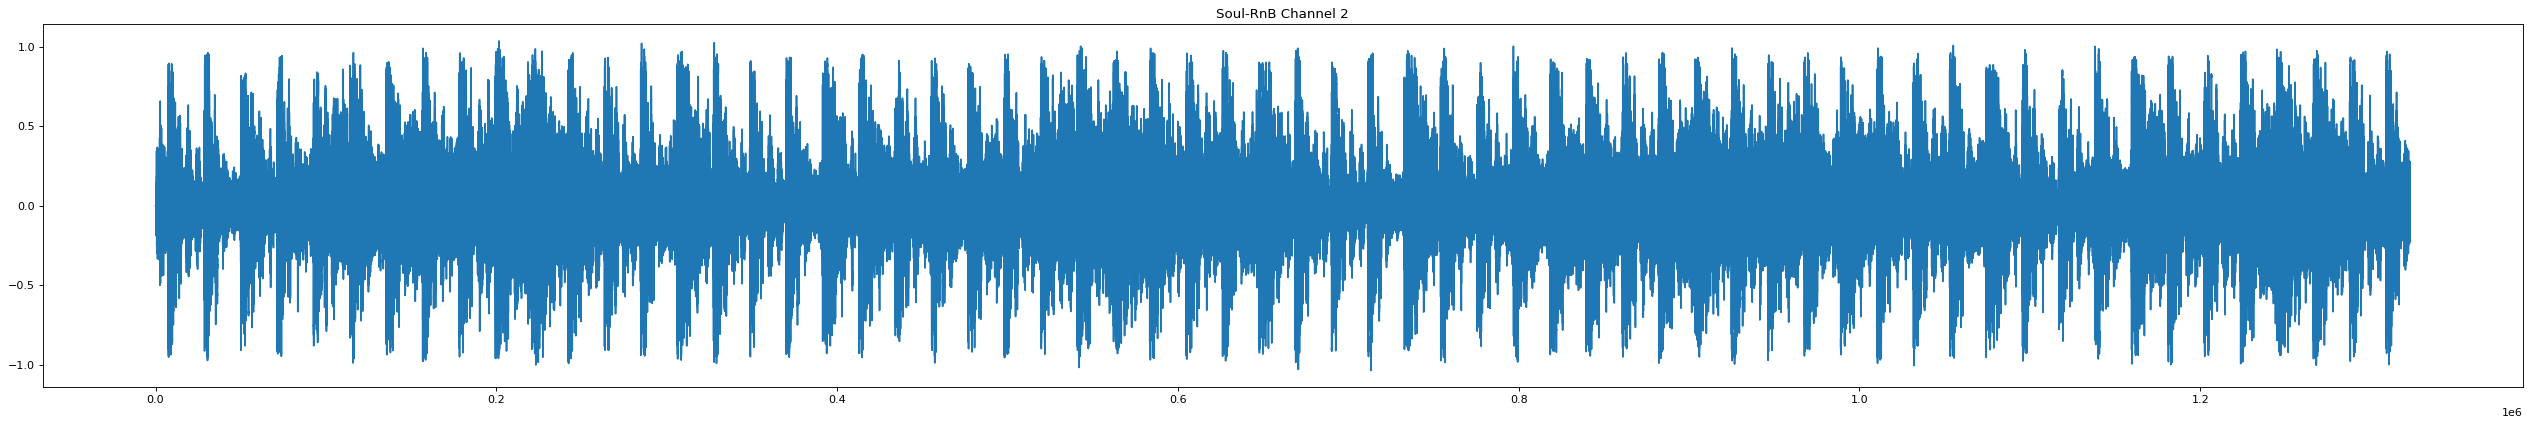

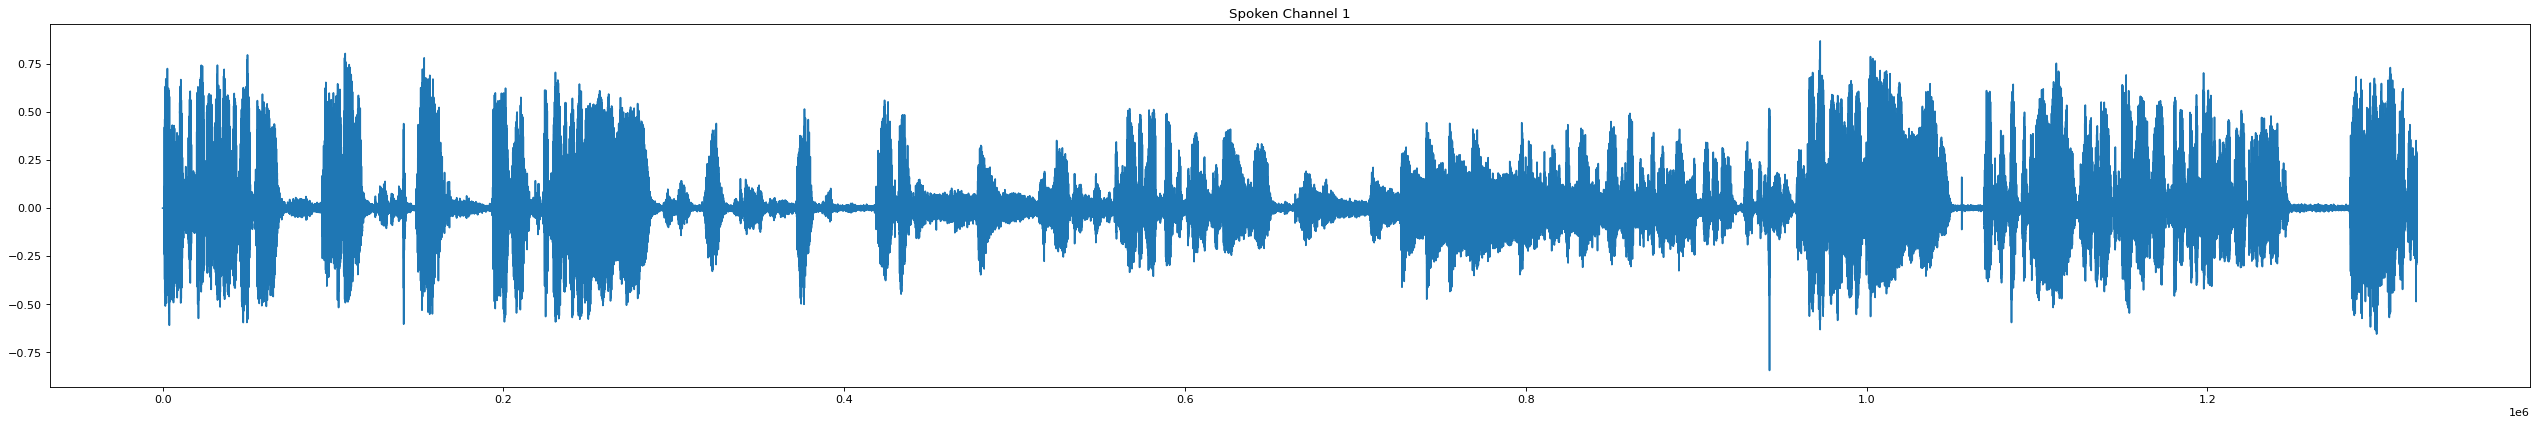

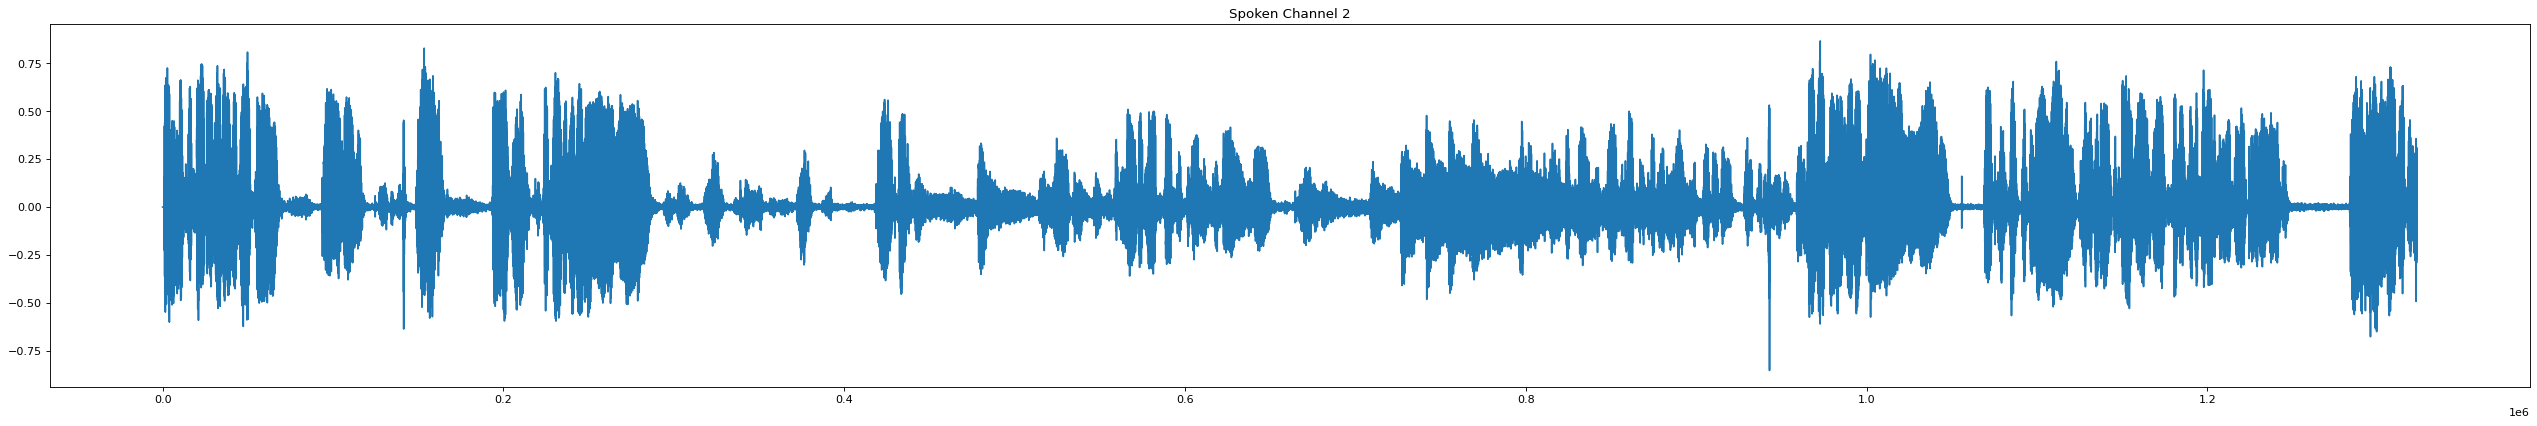

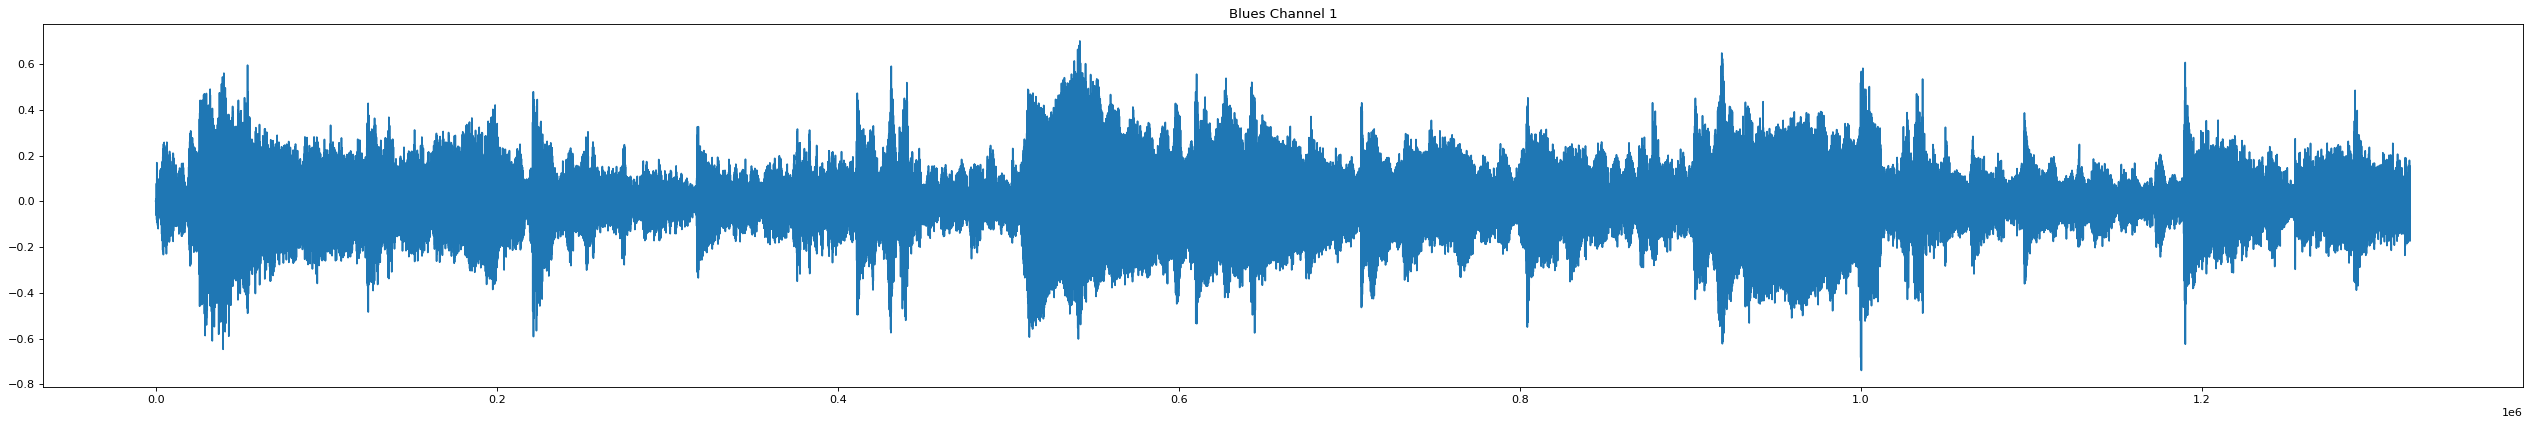

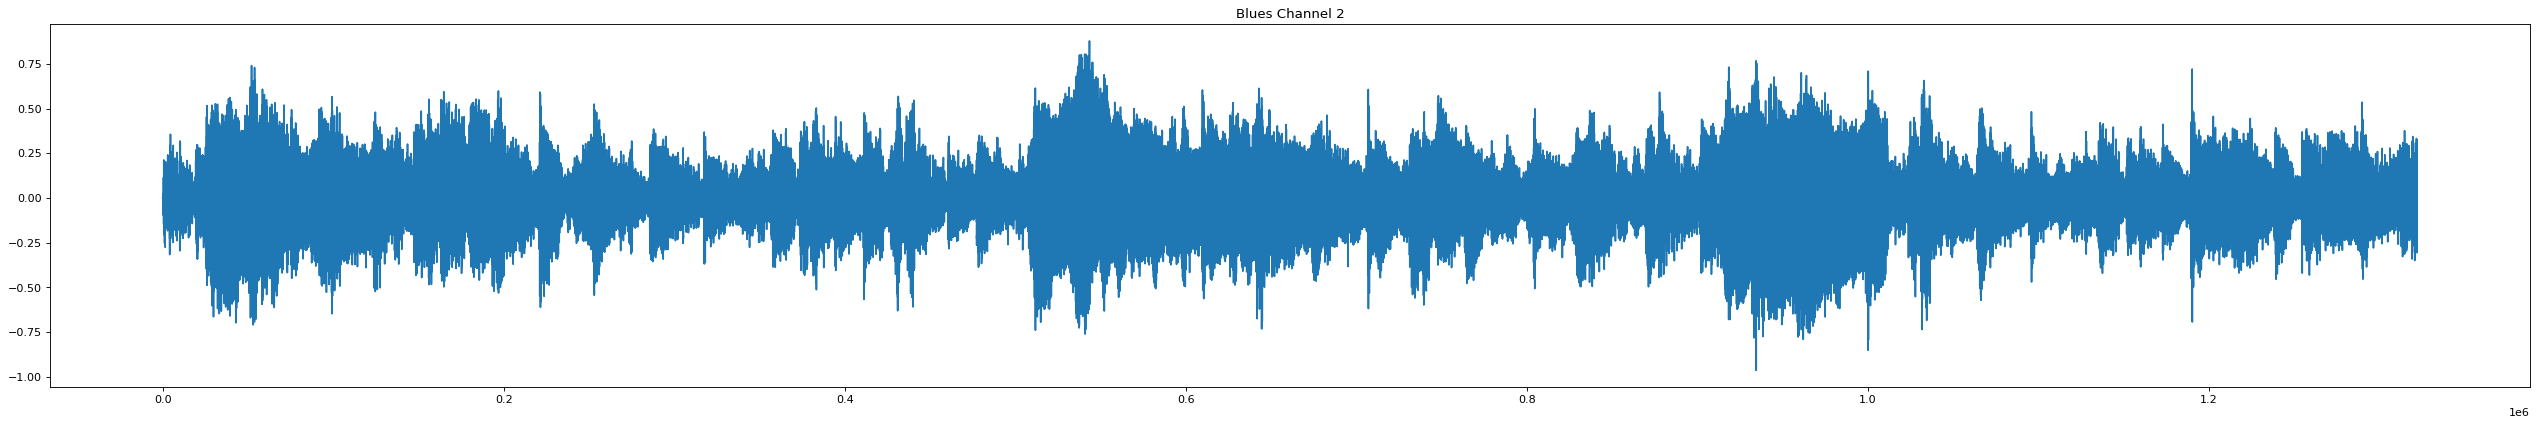

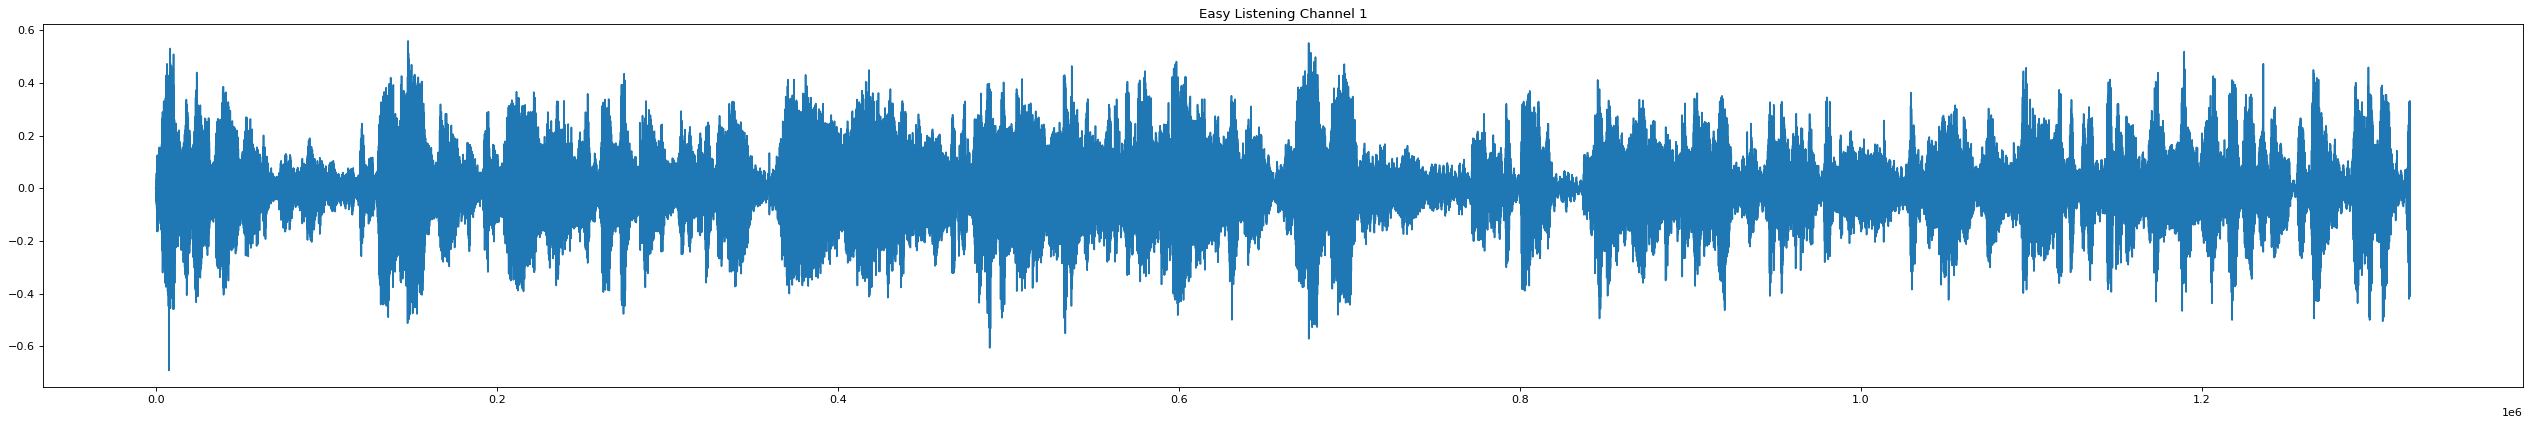

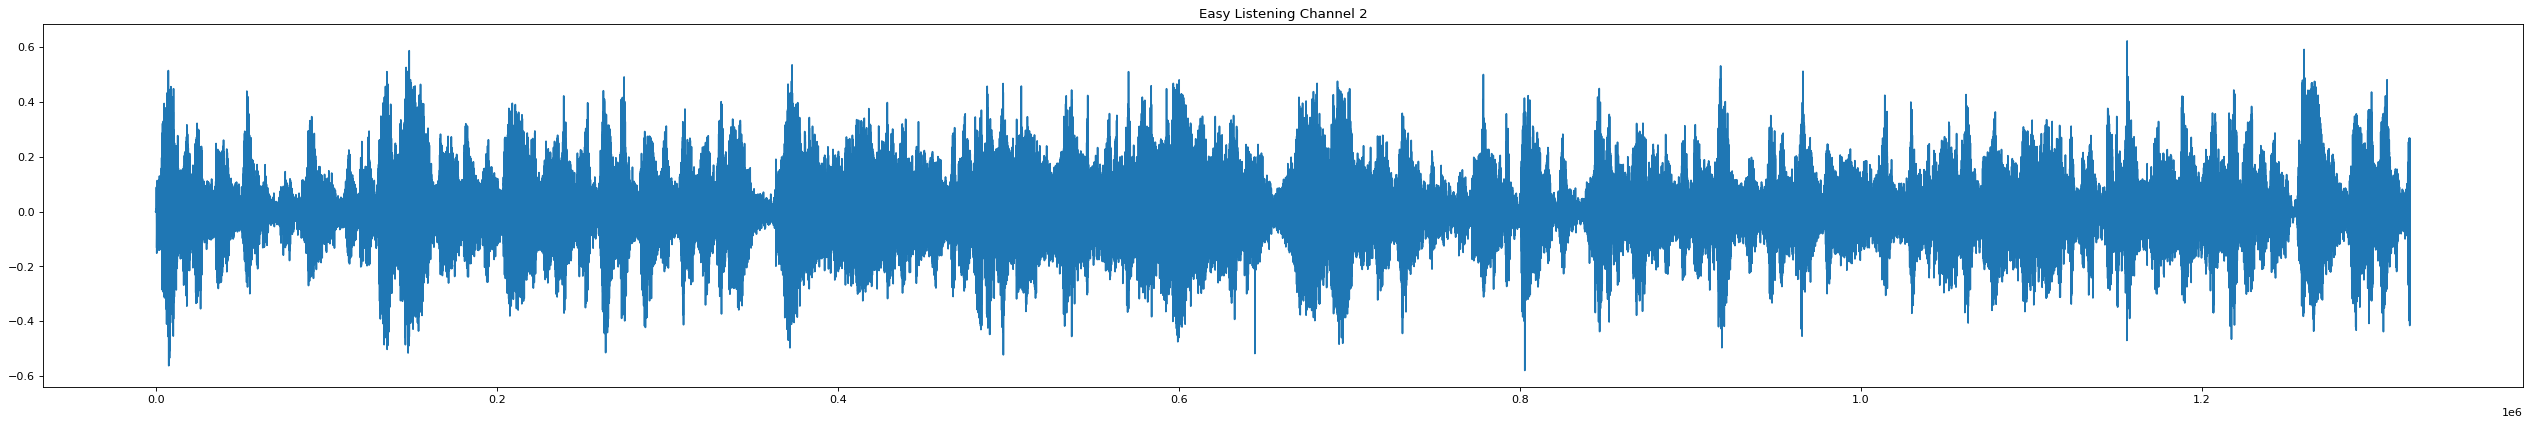

In [31]:
f = open(path+'genre_pairs.txt')
genres = f.read().strip().split('\n')

if not os.path.exists('../figures'):
	os.makedirs('../figures')

for i in range(len(genres)):
    e = examples[i]
    t = genres[i]
    visualize(e,t)
